# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

ANSWER: The pros of the histogram is that it shows us the shape of the data and tells us if the data is skewed a certain way. A con to the histogram is that it is harder to spot outliers and the wrong bin size could affect the interpretation. 

The pros of the box plot is that it clearly shows median, quartiles, outliers and spread. The con is that it doesn't show the full distribution of the data, and could be confusing to certain audiences. 

I would choose the boxplot becuase it clearly shows differences in drug prices and you can pinpoint outliers. I would add a title and axis labels to the graph. I would also make the points solid and do the gradient effect to show where they are more concentrated.


In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

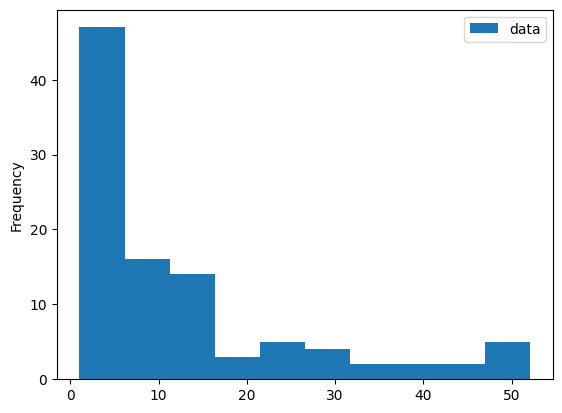

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

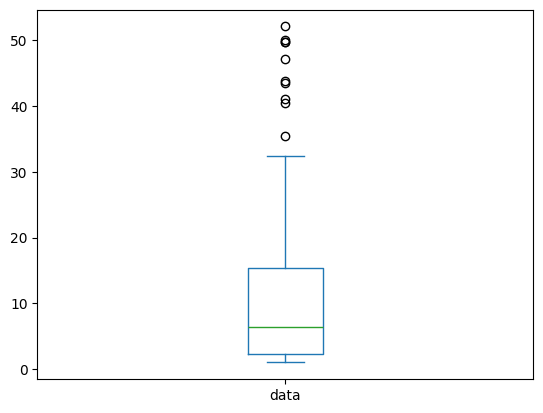

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

DATASET 1: Diabetes Health Indicators

DATASET 2: Heart Disease 

DATASET 3: Colorectal Cancer Global Dataset

In [3]:
#1
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")

#2
df_heart = pd.read_csv("heart_disease.csv")

#3
df_cc = pd.read_csv("colorectal_cancer_dataset.csv")

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


DATASET 1: Diabetes Health Indicators 

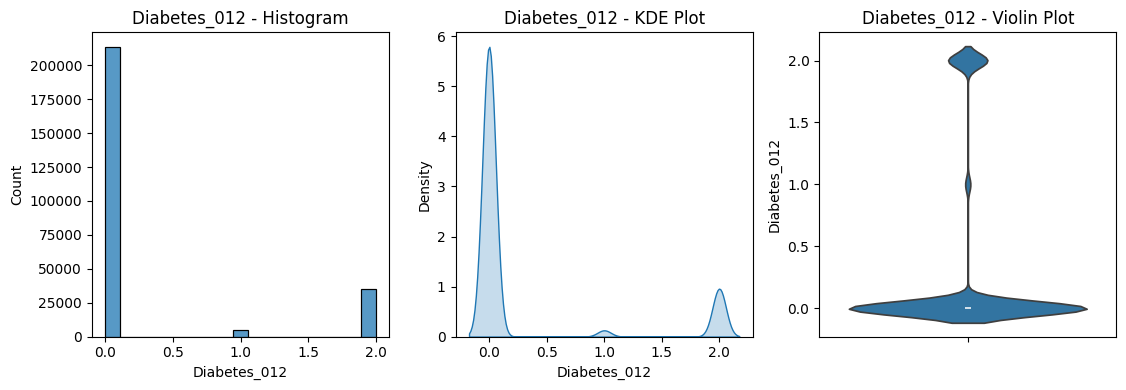

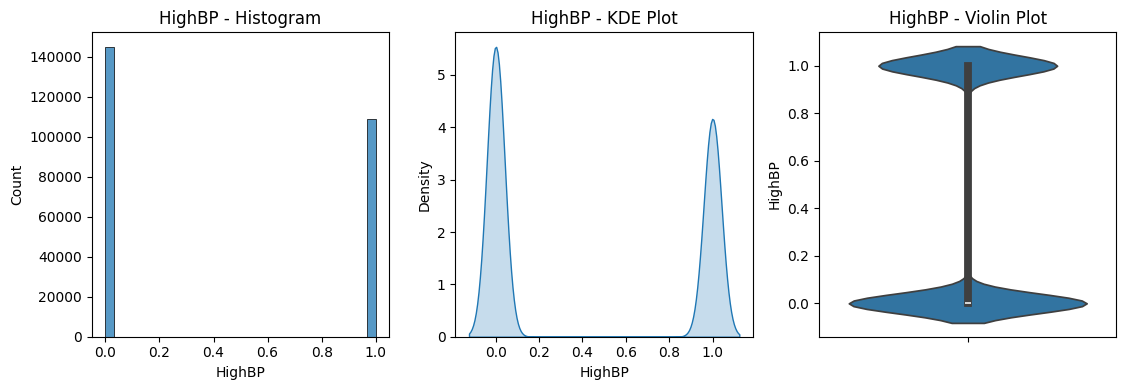

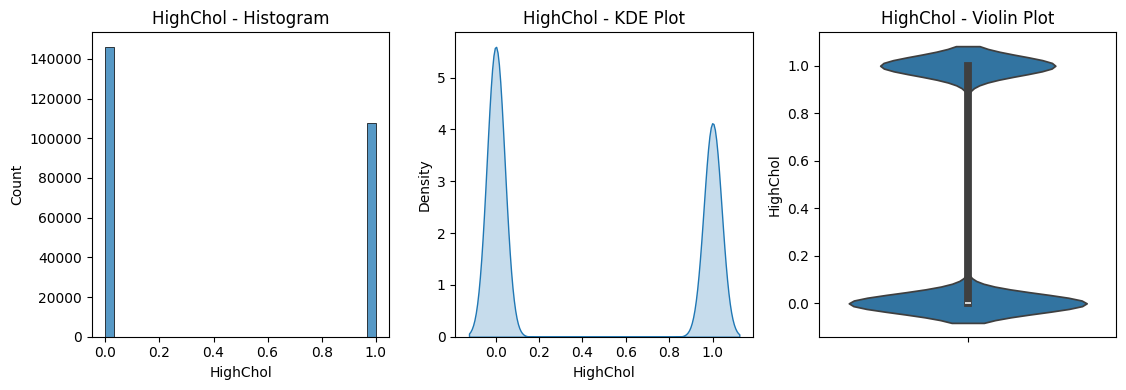

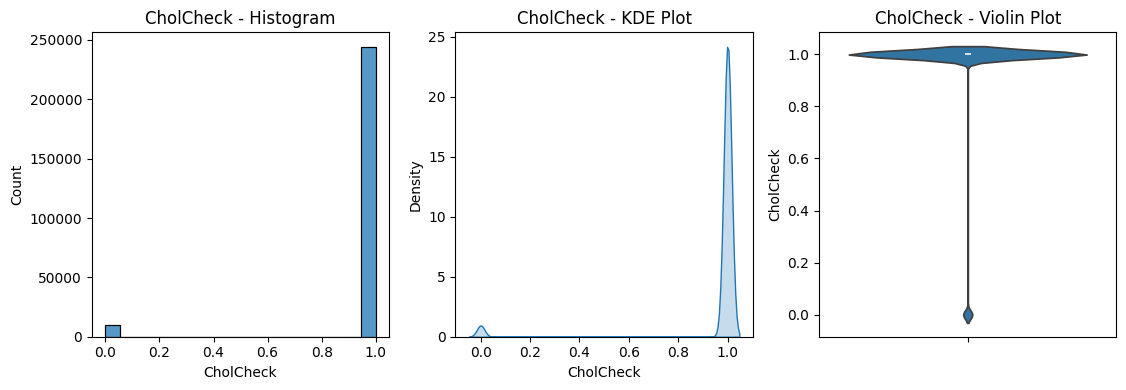

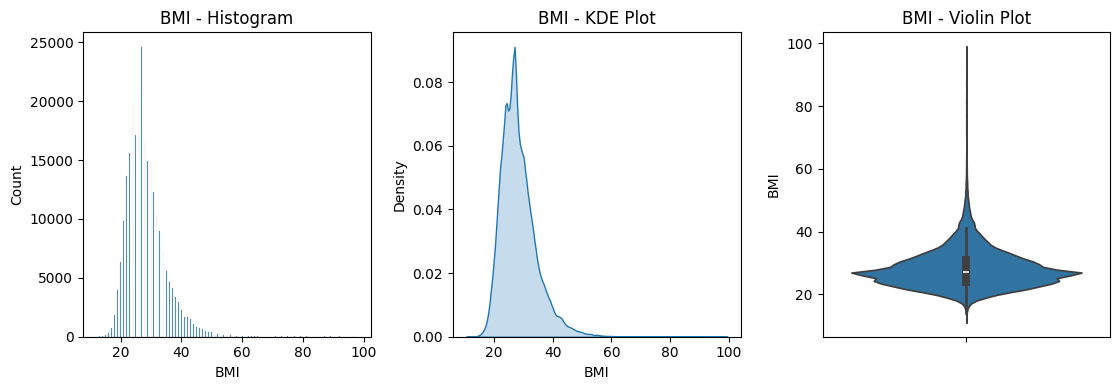

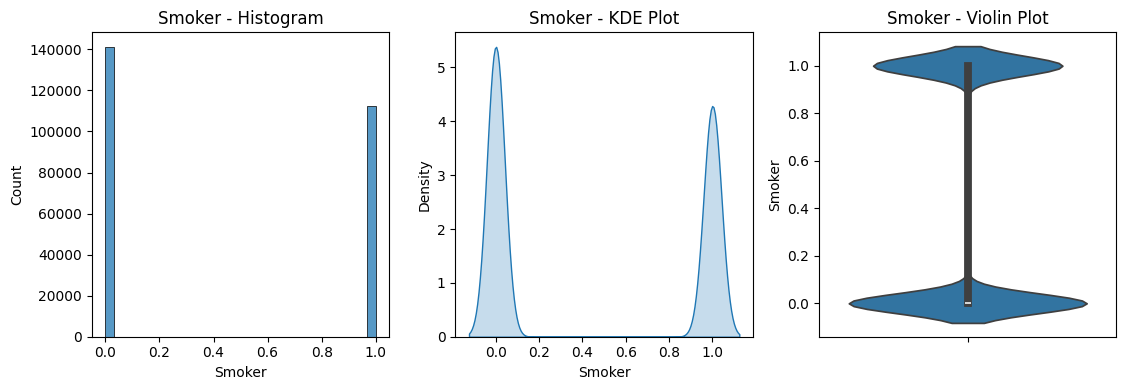

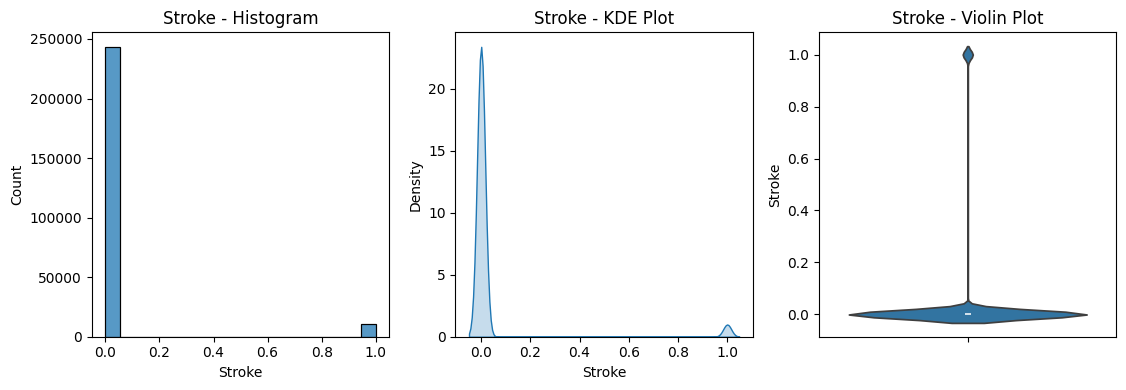

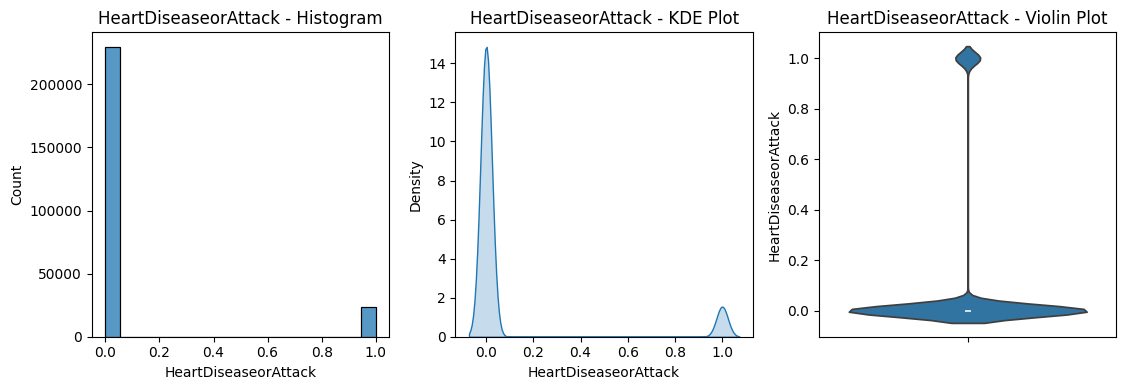

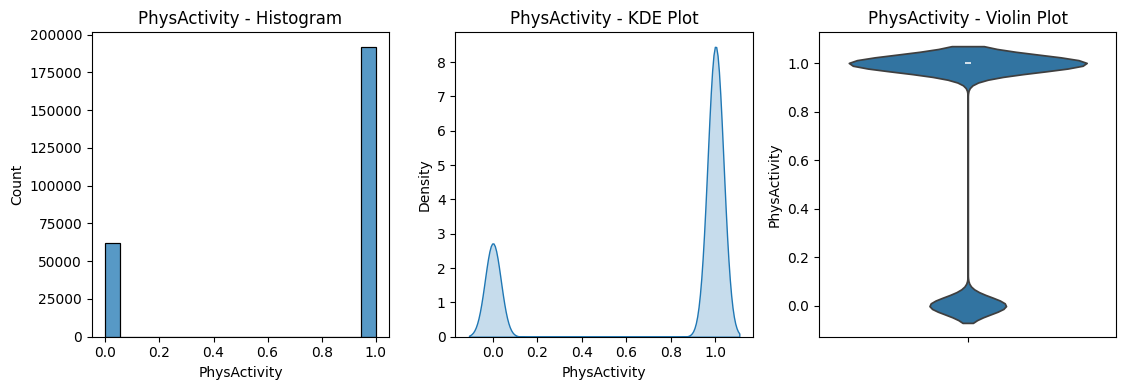

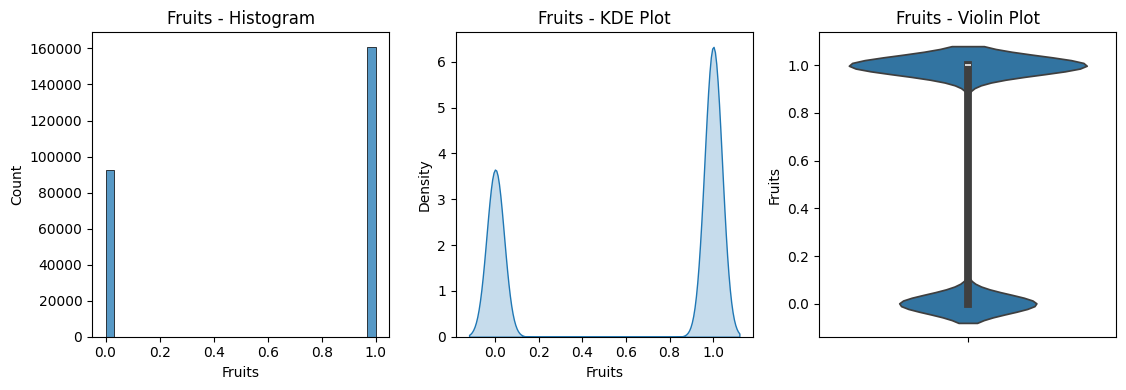

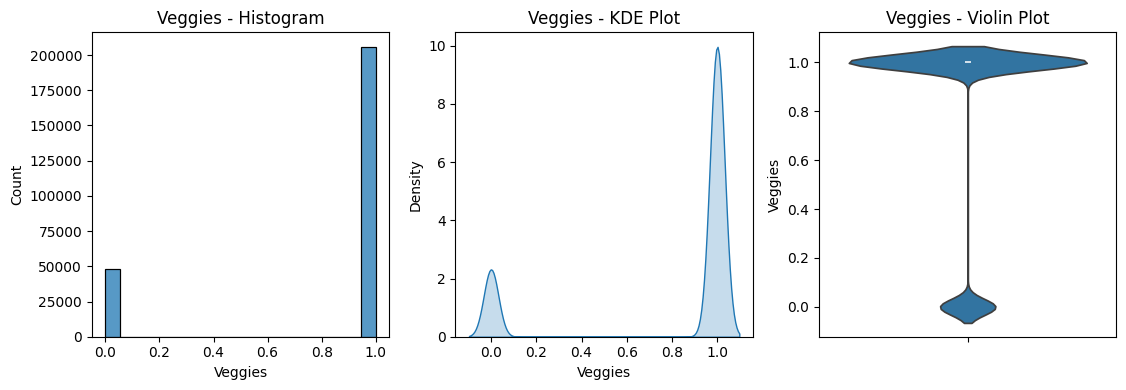

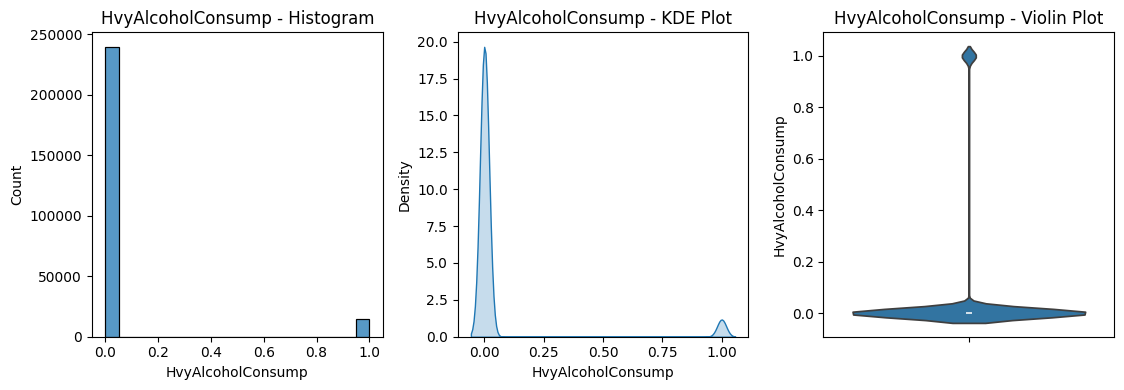

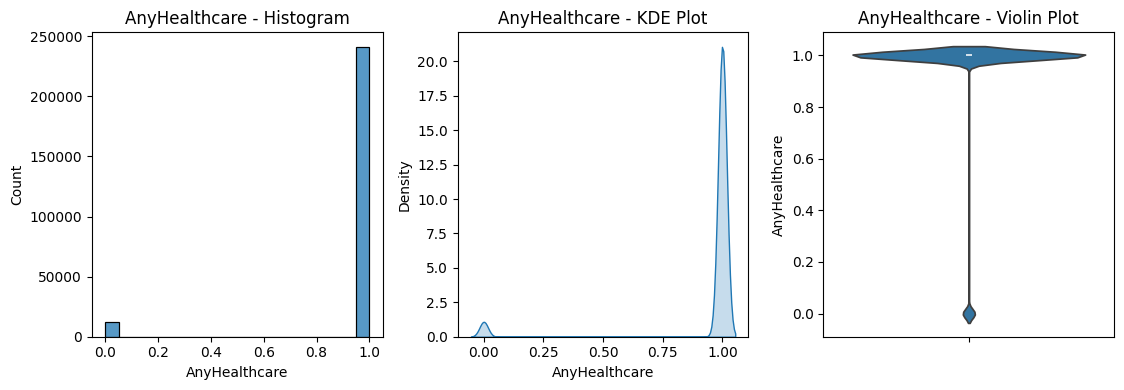

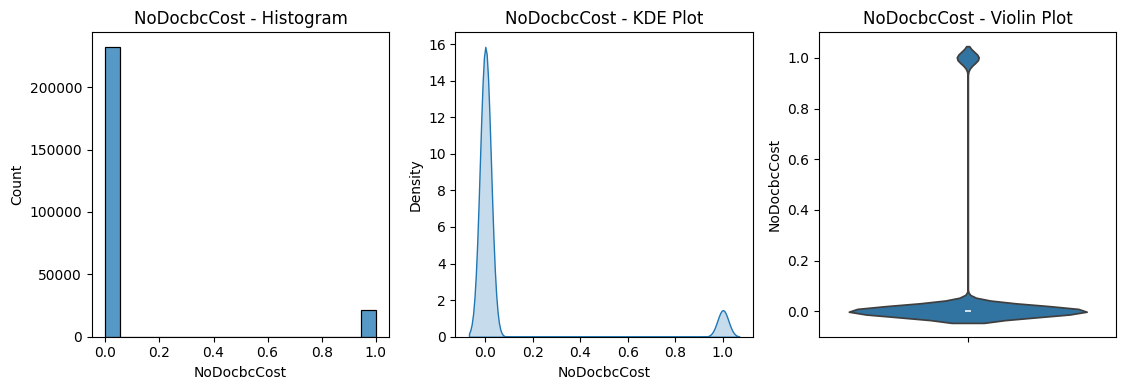

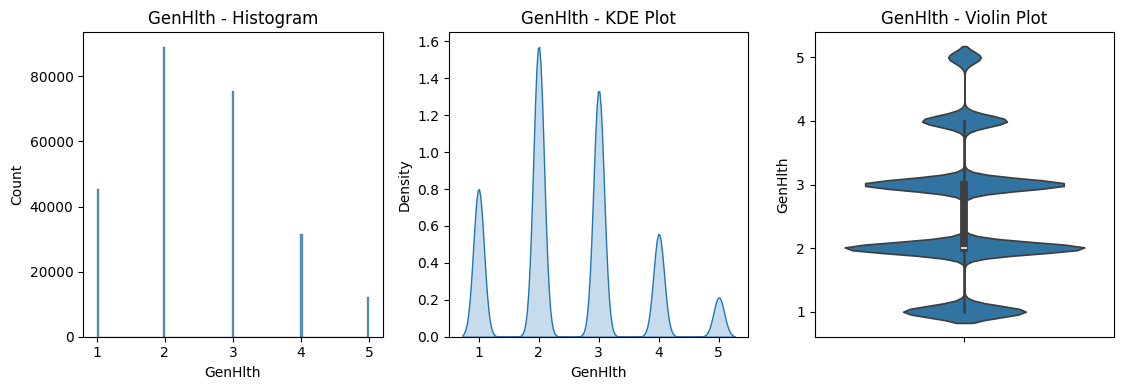

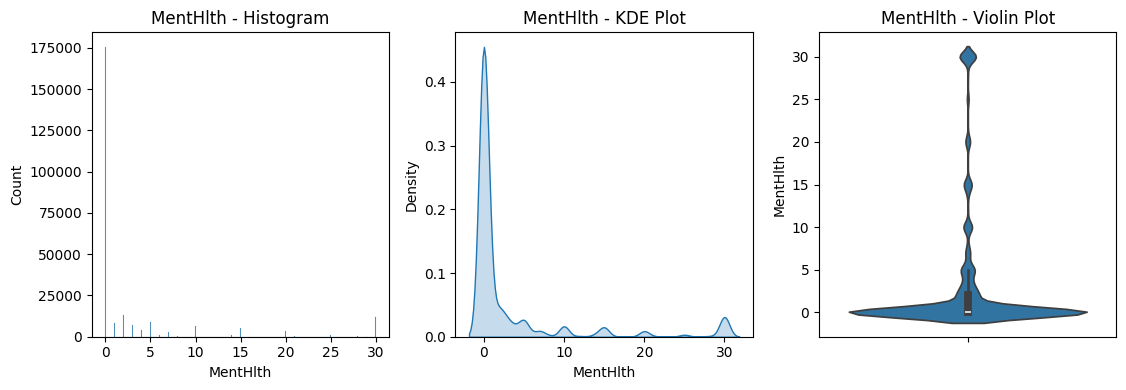

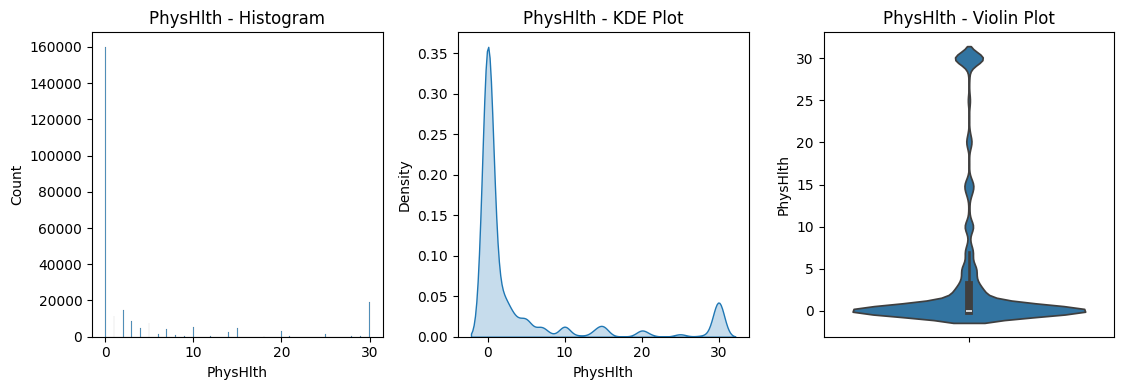

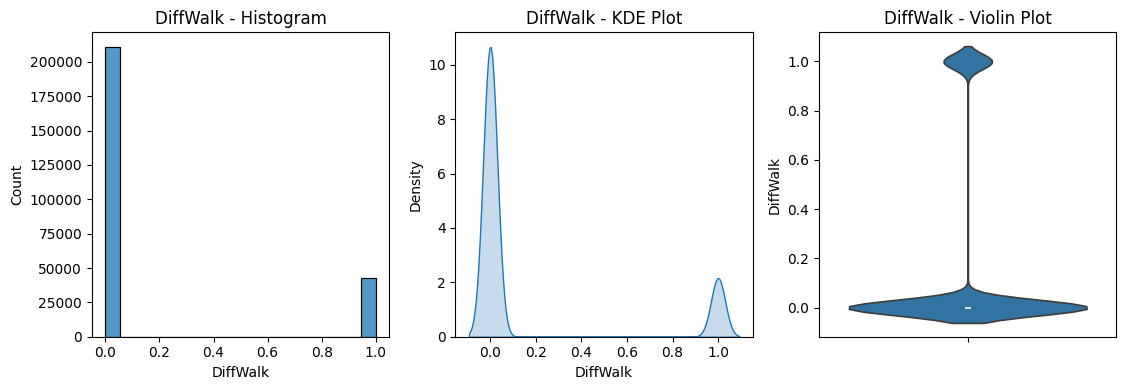

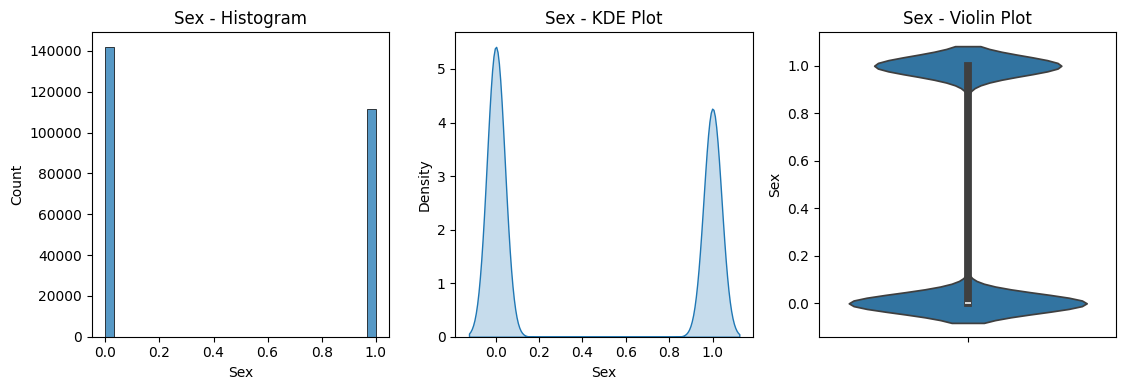

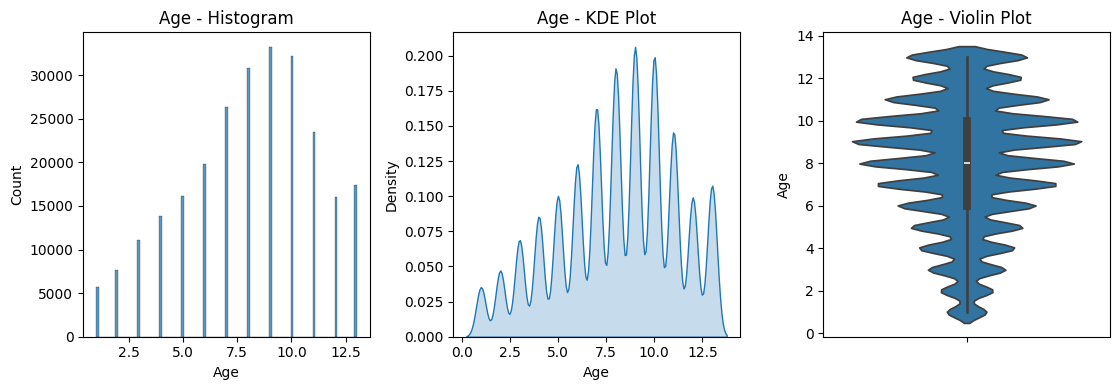

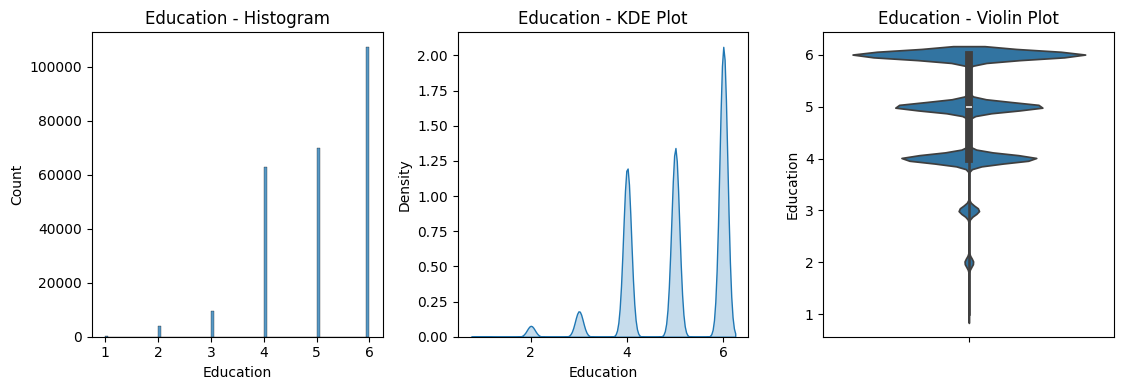

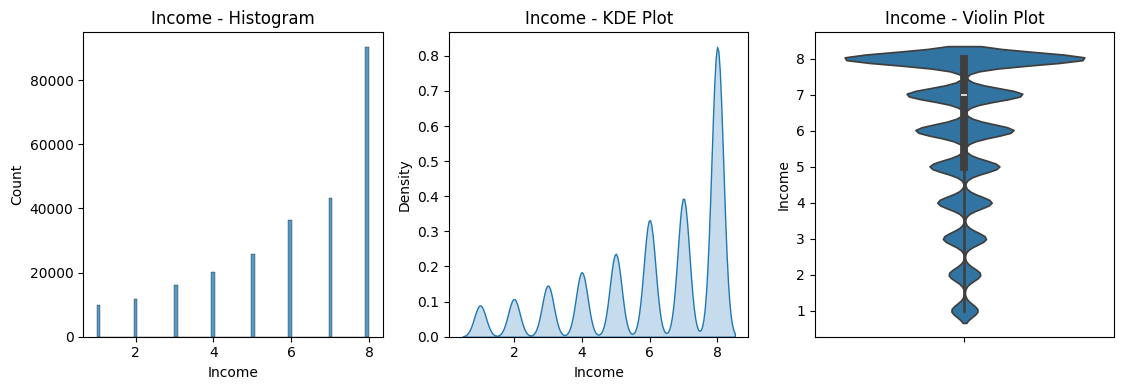

In [5]:
# Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
for col in df.columns:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[col], kde=False)
    plt.title(f'{col} - Histogram')

    # KDE Plot
    plt.subplot(1, 4, 2)
    sns.kdeplot(df[col], fill=True)
    plt.title(f'{col} - KDE Plot')

    # Violin Plot
    plt.subplot(1, 4, 3)
    sns.violinplot(y=df[col])
    plt.title(f'{col} - Violin Plot')

    plt.tight_layout()
    plt.show()
    plt.close()

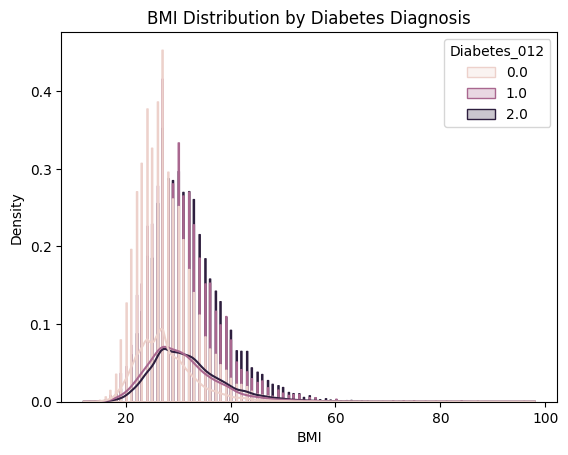

In [18]:
#Draw grouped histograms

sns.histplot(data=df, x='BMI', hue='Diabetes_012', kde=True, element='step', stat='density', common_norm=False)
plt.title("BMI Distribution by Diabetes Diagnosis")
plt.xlabel("BMI")
plt.ylabel("Density")
plt.show()

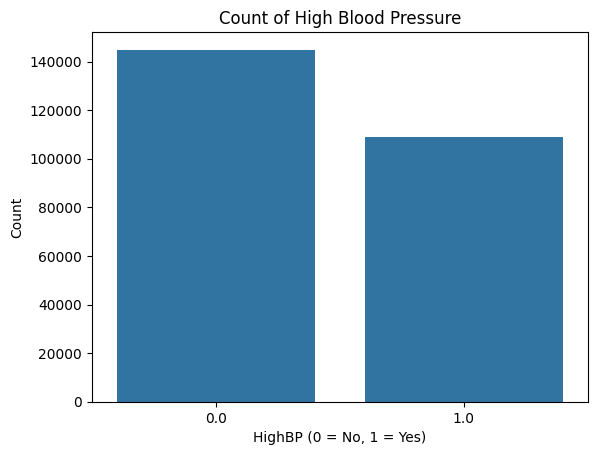

In [12]:
#Draw a bar plot to indicate total counts of each categorical variable in a given column
sns.countplot(x='HighBP', data=df)
plt.title("Count of High Blood Pressure")
plt.xlabel("HighBP (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [14]:
#Find means, medians, and modes
mean_media_mode_table = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Mode": df.mode().iloc[0]
})
print(mean_media_mode_table)

                           Mean  Median  Mode
Diabetes_012           0.296921     0.0   0.0
HighBP                 0.429001     0.0   0.0
HighChol               0.424121     0.0   0.0
CholCheck              0.962670     1.0   1.0
BMI                   28.382364    27.0  27.0
Smoker                 0.443169     0.0   0.0
Stroke                 0.040571     0.0   0.0
HeartDiseaseorAttack   0.094186     0.0   0.0
PhysActivity           0.756544     1.0   1.0
Fruits                 0.634256     1.0   1.0
Veggies                0.811420     1.0   1.0
HvyAlcoholConsump      0.056197     0.0   0.0
AnyHealthcare          0.951053     1.0   1.0
NoDocbcCost            0.084177     0.0   0.0
GenHlth                2.511392     2.0   2.0
MentHlth               3.184772     0.0   0.0
PhysHlth               4.242081     0.0   0.0
DiffWalk               0.168224     0.0   0.0
Sex                    0.440342     0.0   0.0
Age                    8.032119     8.0   9.0
Education              5.050434   

In [15]:
min_max_table = pd.DataFrame({
    "Min": df.min(),
    "Max": df.max()
})
print(min_max_table)

                       Min   Max
Diabetes_012           0.0   2.0
HighBP                 0.0   1.0
HighChol               0.0   1.0
CholCheck              0.0   1.0
BMI                   12.0  98.0
Smoker                 0.0   1.0
Stroke                 0.0   1.0
HeartDiseaseorAttack   0.0   1.0
PhysActivity           0.0   1.0
Fruits                 0.0   1.0
Veggies                0.0   1.0
HvyAlcoholConsump      0.0   1.0
AnyHealthcare          0.0   1.0
NoDocbcCost            0.0   1.0
GenHlth                1.0   5.0
MentHlth               0.0  30.0
PhysHlth               0.0  30.0
DiffWalk               0.0   1.0
Sex                    0.0   1.0
Age                    1.0  13.0
Education              1.0   6.0
Income                 1.0   8.0



Conclusions

1) Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
- The data is what I would expect. With health data, there is always a lot of variation due to human nature, but with a lot of datapoints there are clear trends in the data. For example most people are in the mid-BMI range with some really high and some really low. 
- The data is useable. 


2) What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
- Education and income are left skewed while BMI is right skewed. The rest are 0/1 binary so there is no normal distribution.


3) Are there any outliers present?  (Data points that are far from the others.)
- There are outliers in the BMI column. The columns with binary answers do not have outliers since there are only two categories. 


4) If there are multiple related histograms, how does the distribution change across different groups?
- When grouping by Diabetes, BMI or HighBP shift higher in those with diabetes as expected.


5) What are the minimum and maximum values represented in each histogram?
- see table above


6) How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
- Too few bins showes more detail but looks noisy, while many bins smooths out the distribution but might be hiding trends and outliers.  


7) Does the distribution appear normal, or does it have a different distribution?
- Normal but skewed right or left as described above. 

DATASET 2: Heart Disease

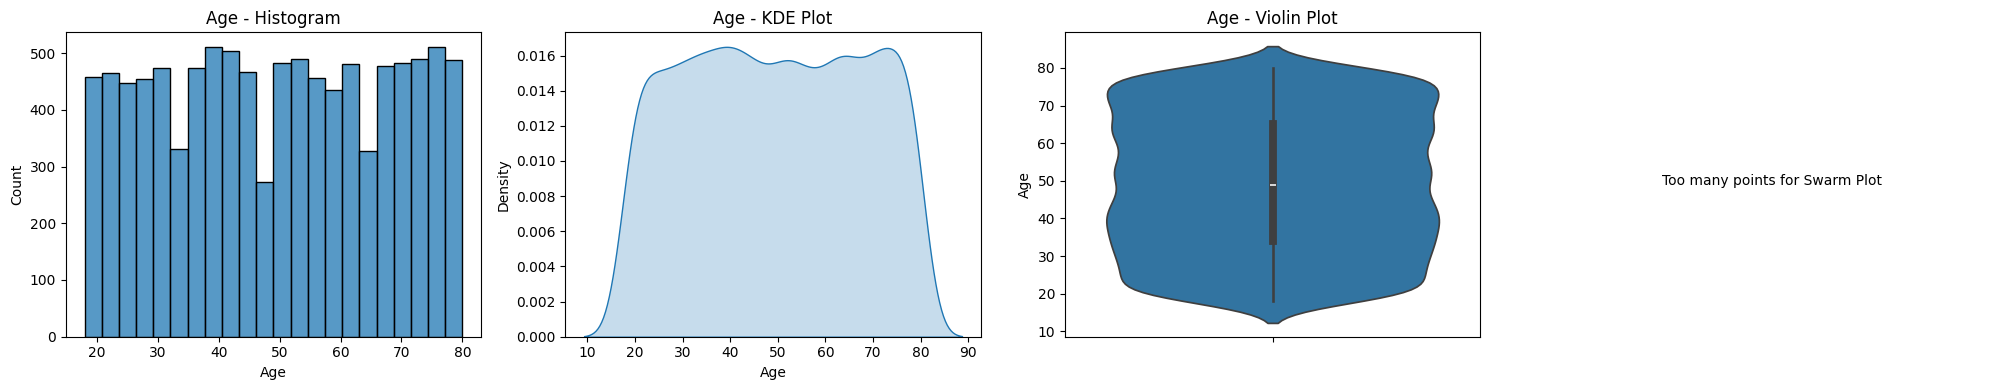

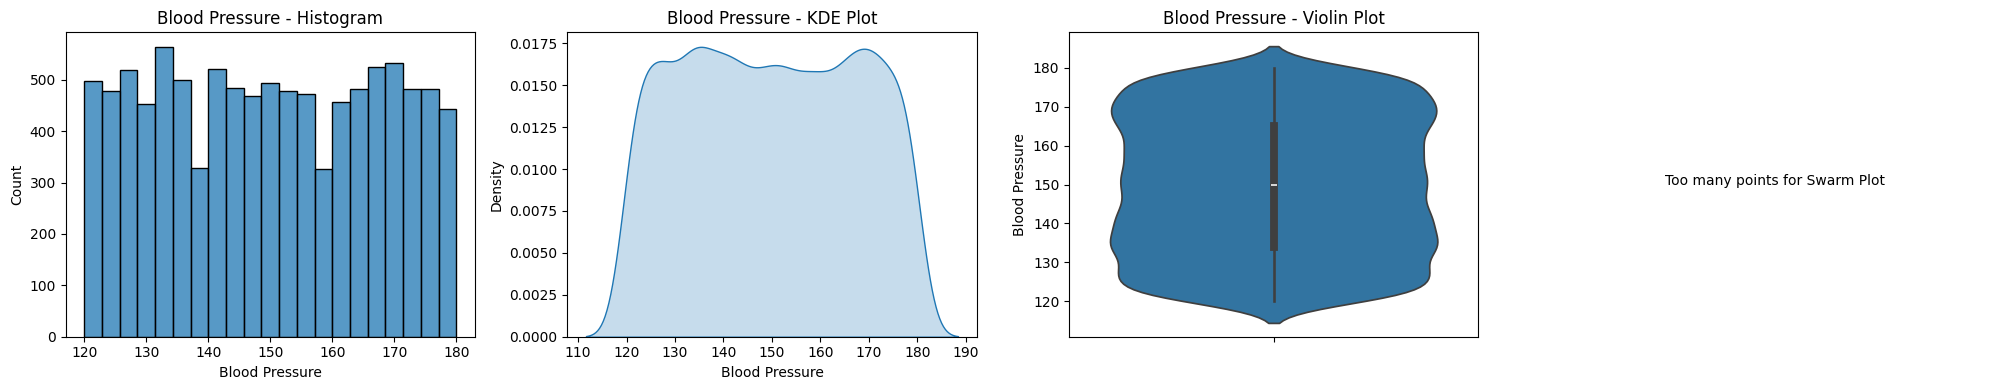

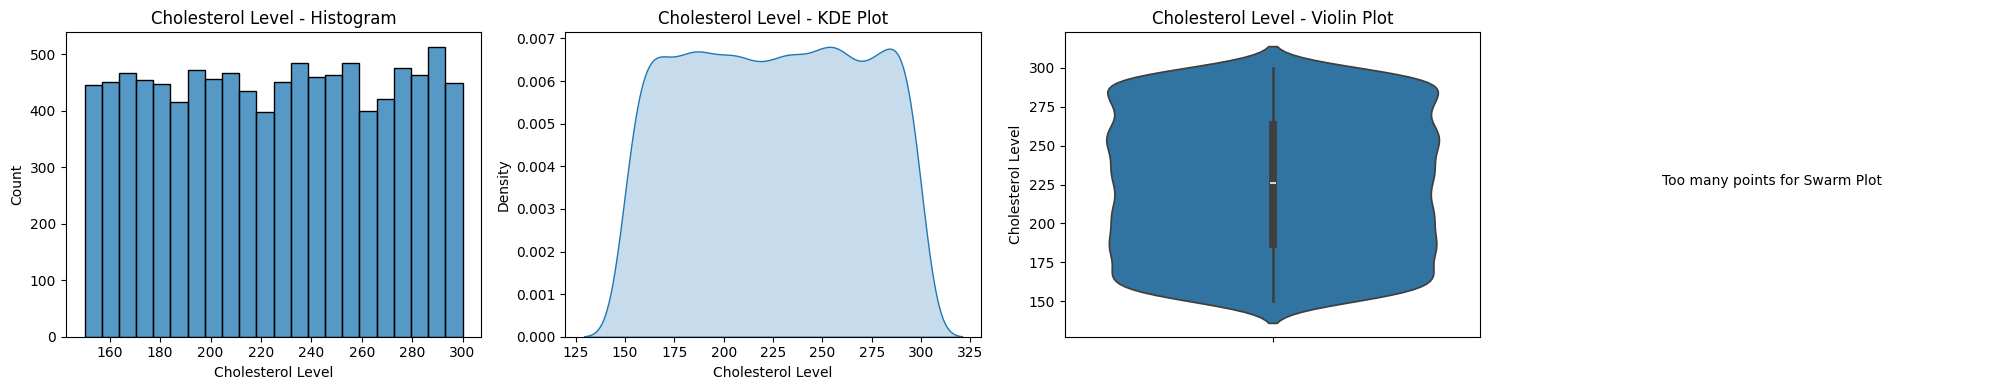

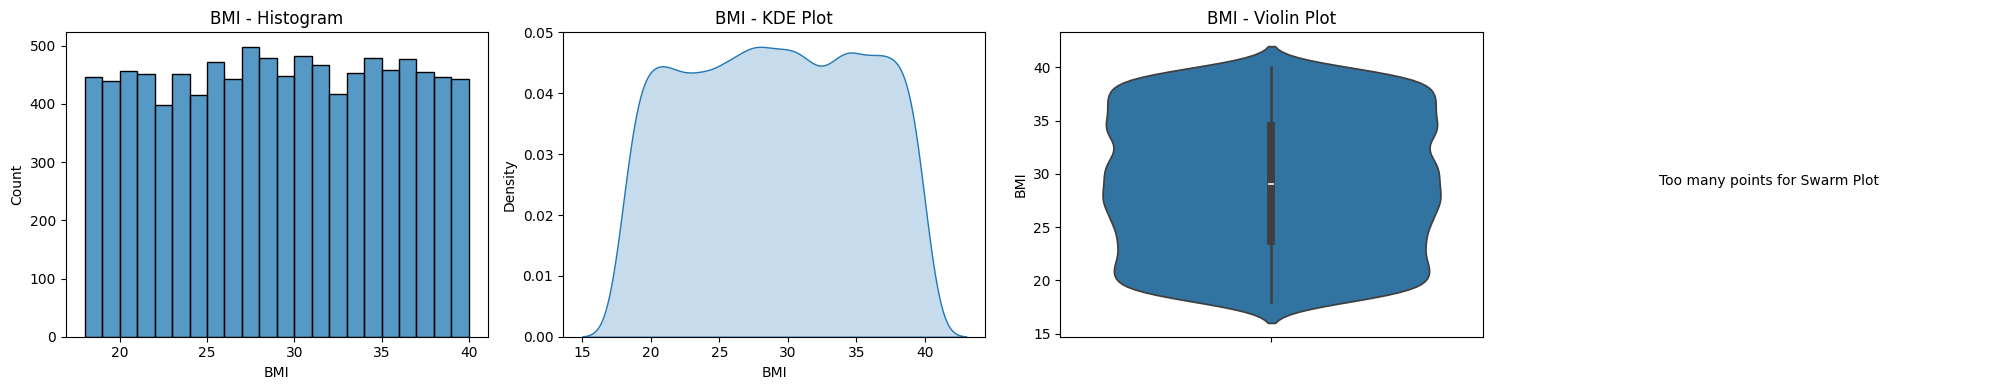

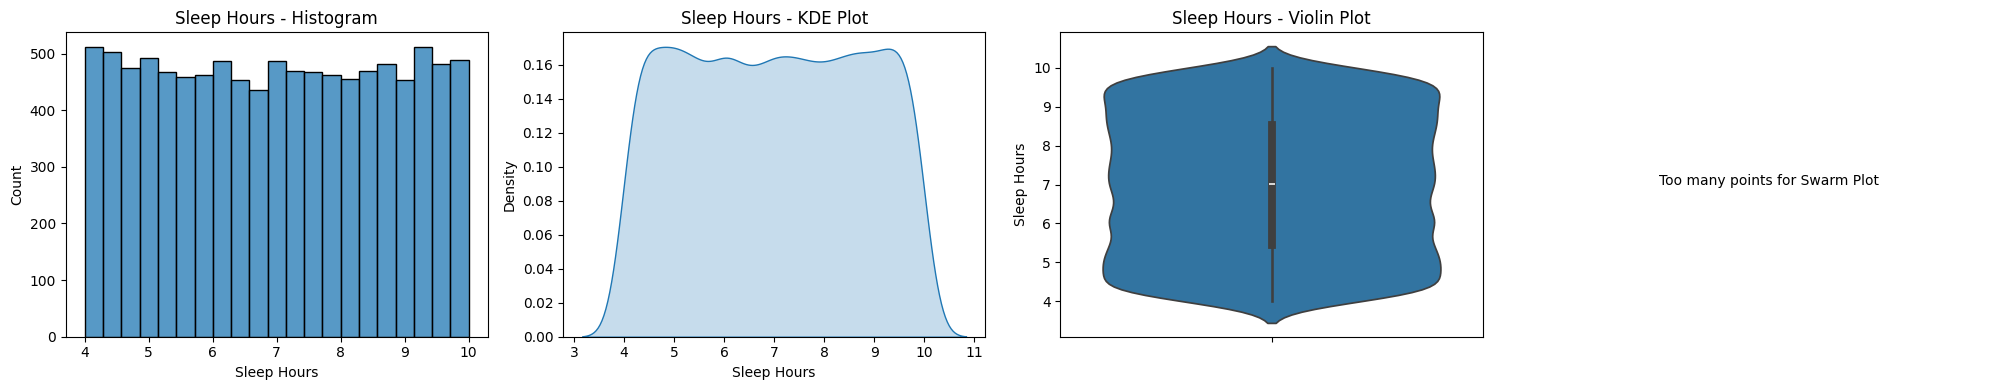

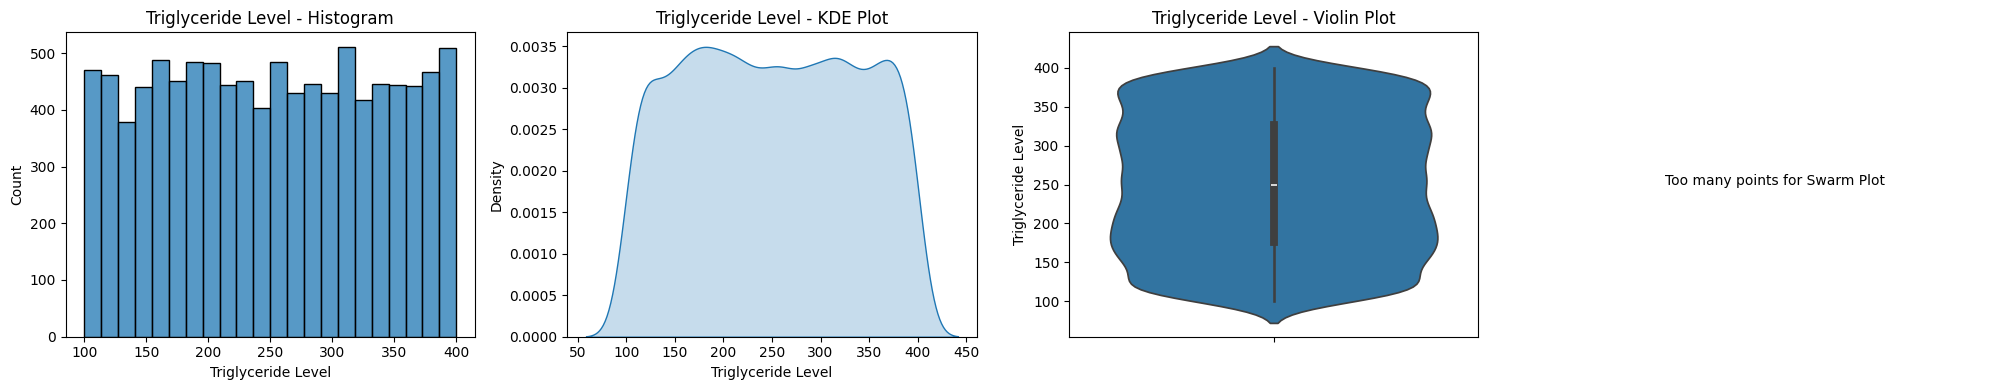

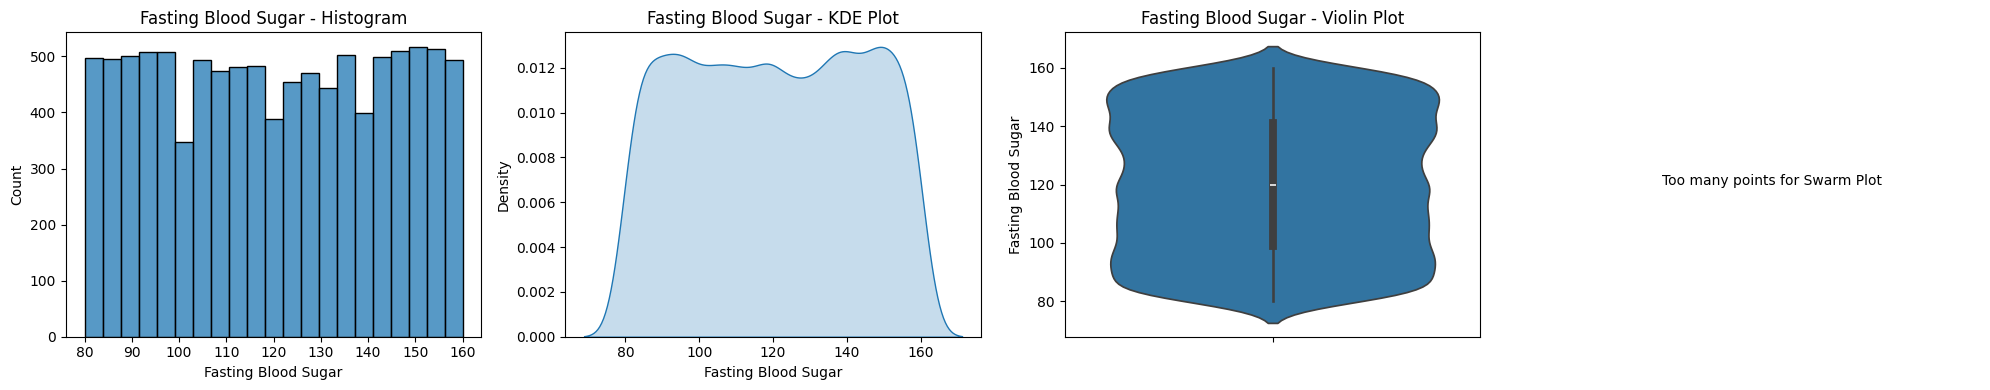

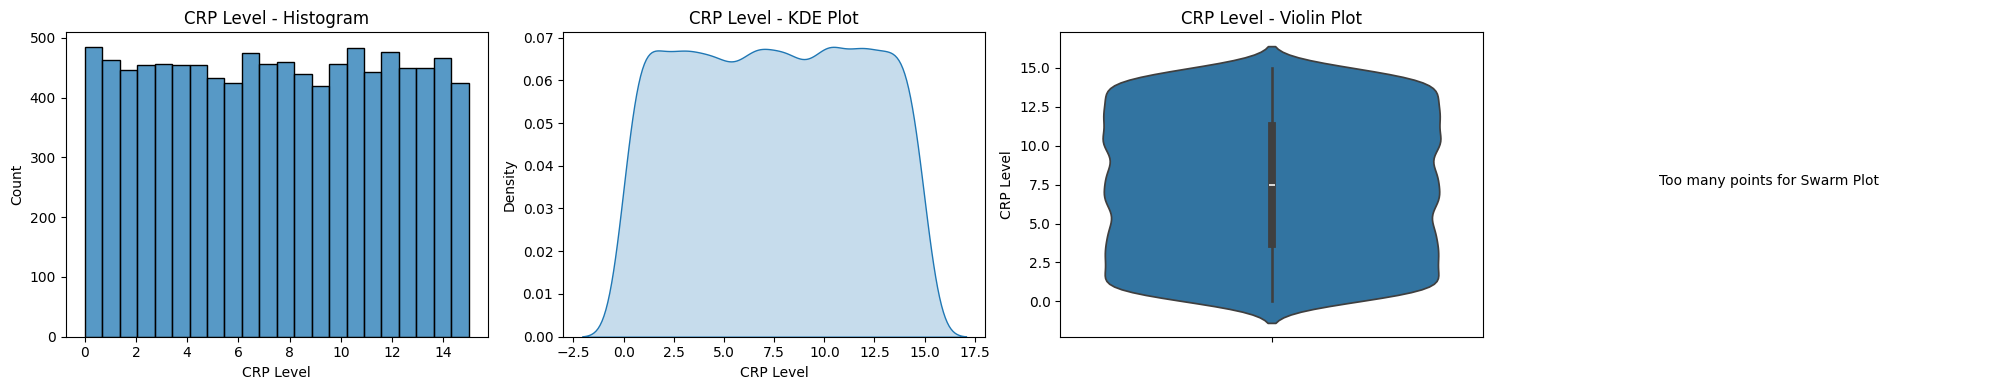

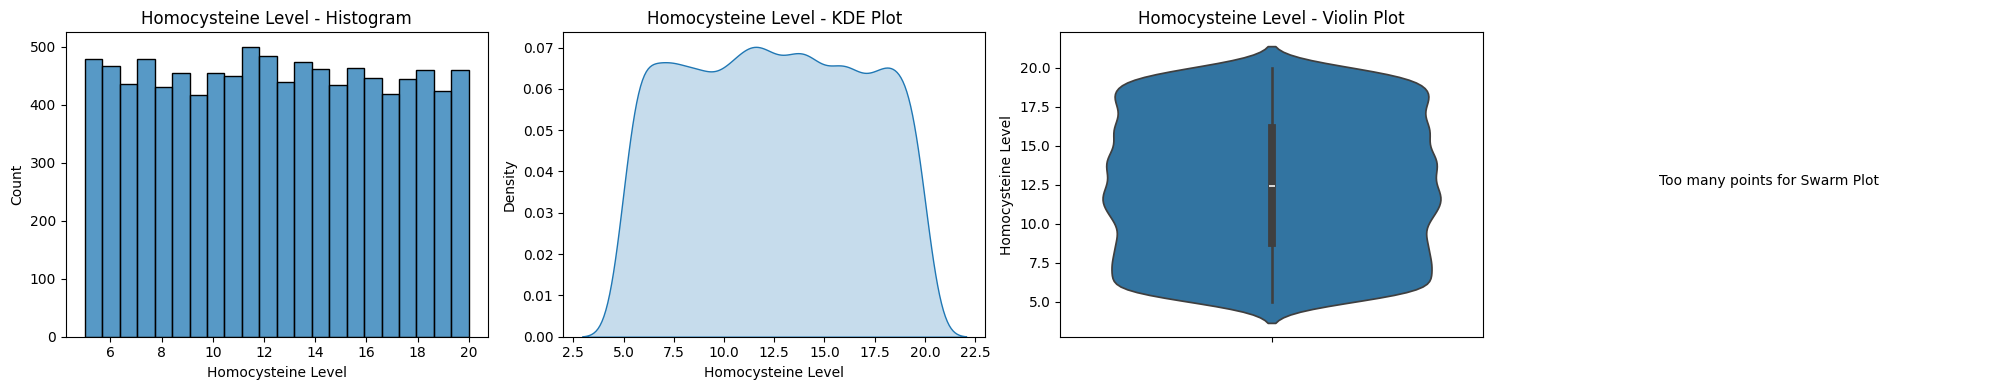

In [7]:
# Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
for col in df_heart.select_dtypes(include='number').columns:
    plt.figure(figsize=(20, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df_heart[col], kde=False)
    plt.title(f'{col} - Histogram')

    # KDE Plot
    plt.subplot(1, 4, 2)
    sns.kdeplot(df_heart[col], fill=True)
    plt.title(f'{col} - KDE Plot')

    # Violin Plot
    plt.subplot(1, 4, 3)
    sns.violinplot(y=df_heart[col])
    plt.title(f'{col} - Violin Plot')

    # Swarm Plot (only if <500 rows to avoid clutter)
    plt.subplot(1, 4, 4)
    if len(df_heart) < 500:
        sns.swarmplot(y=df_heart[col], x=[""] * len(df_heart))
        plt.title(f'{col} - Swarm Plot')
    else:
        plt.text(0.5, 0.5, "Too many points for Swarm Plot", ha='center')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

In [13]:
df_heart.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

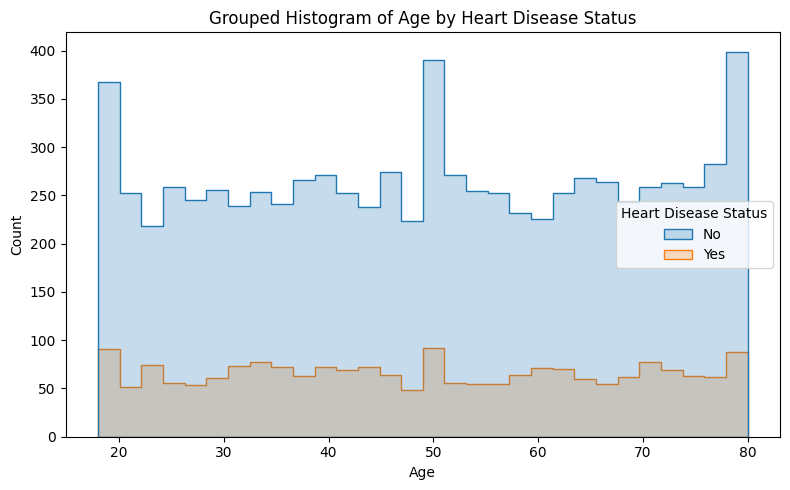

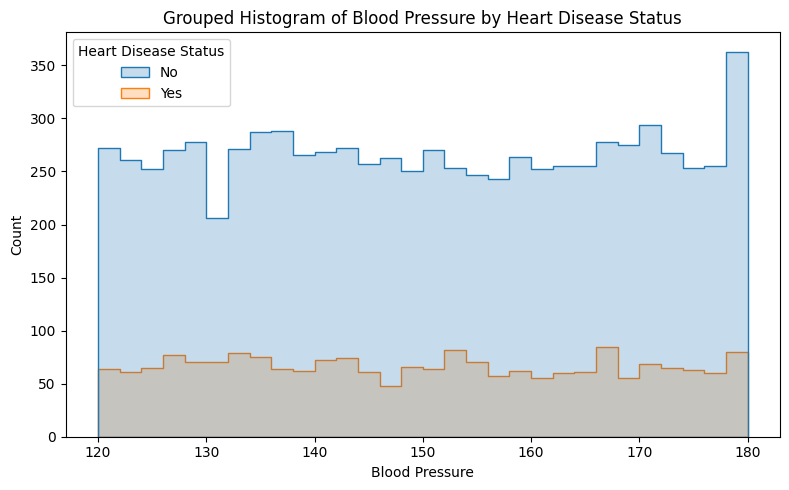

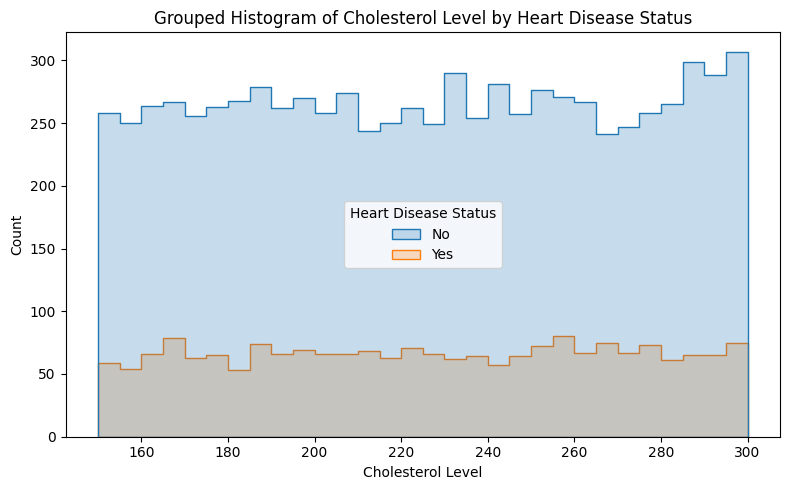

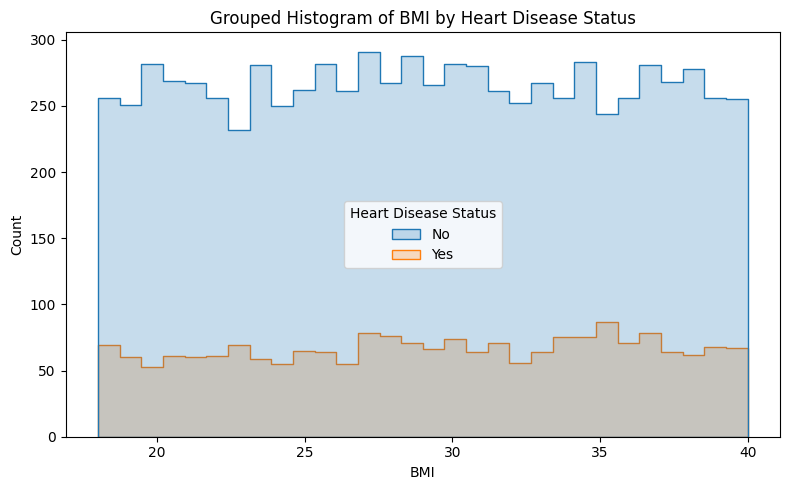

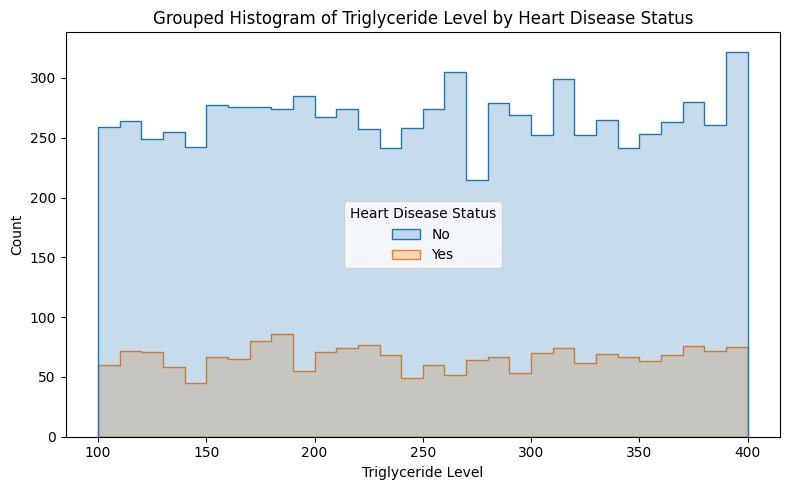

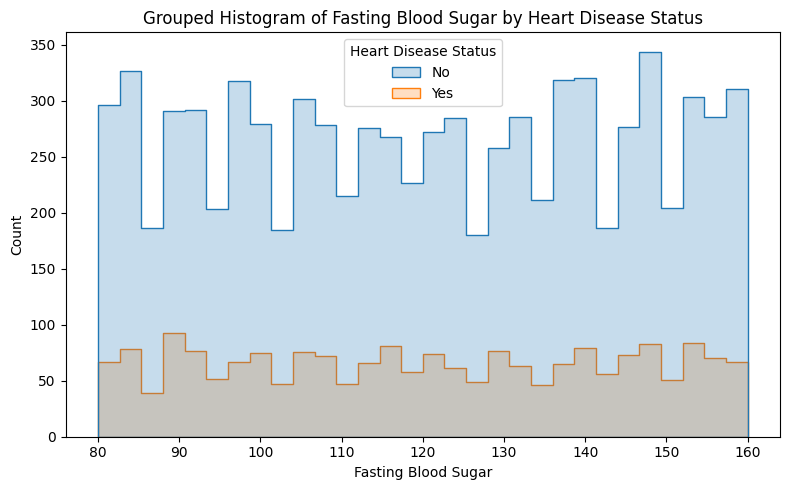

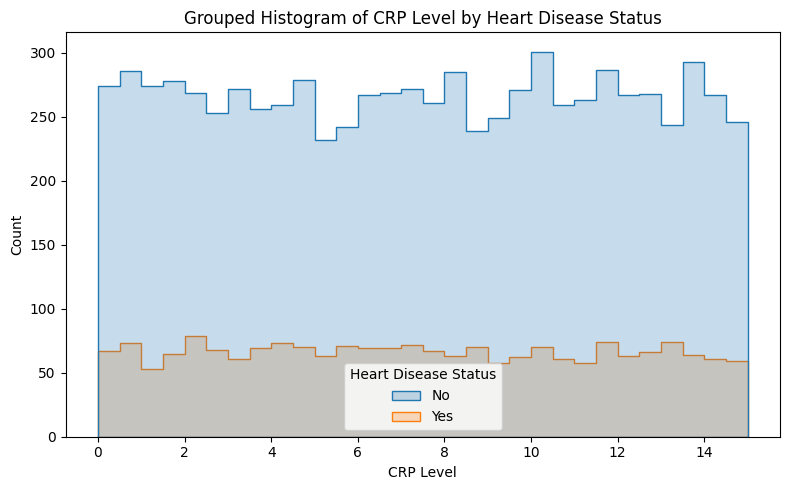

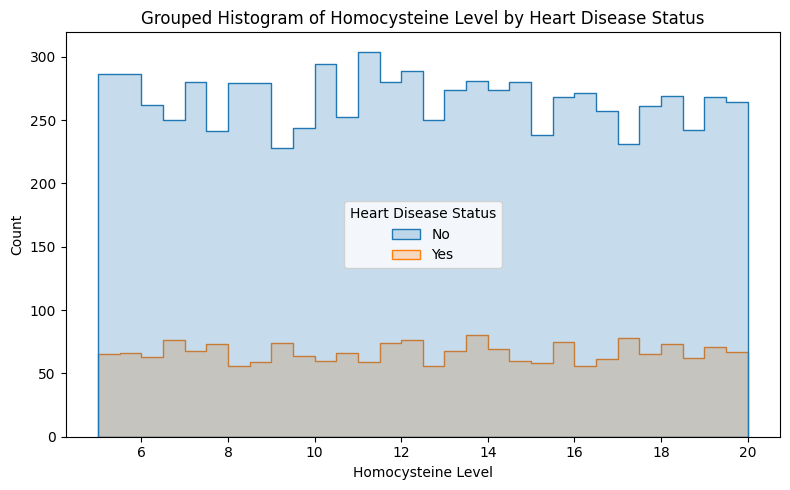

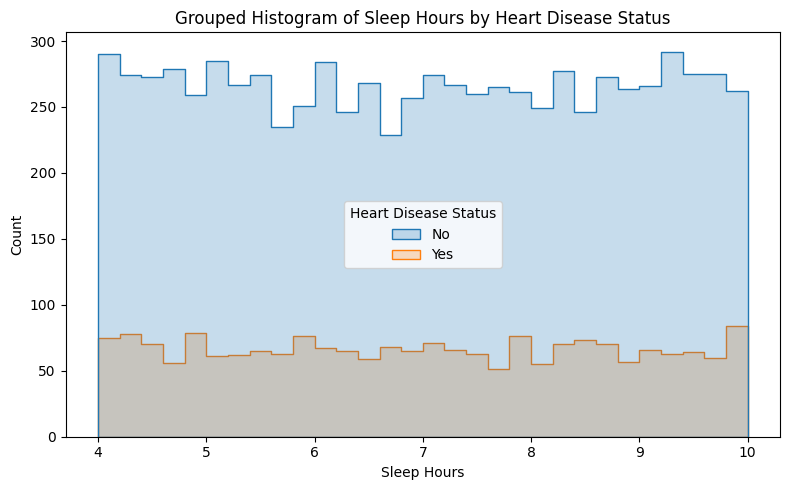

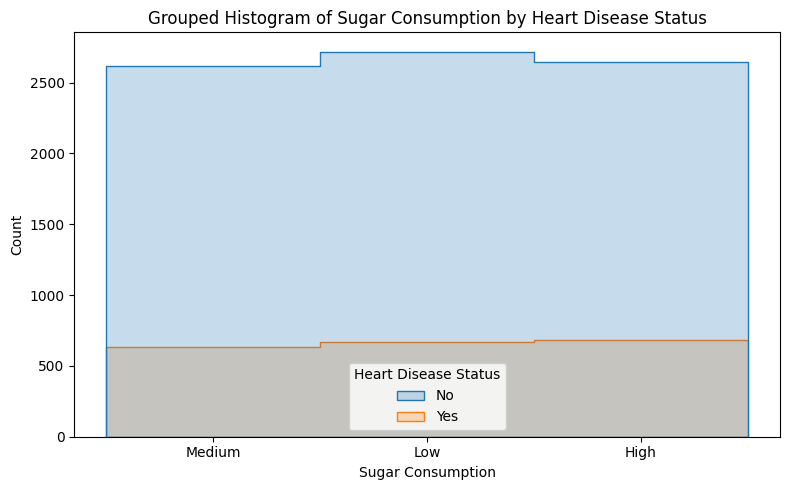

In [ ]:
# grouped histograms

group_col = 'Heart Disease Status'  # group variable

# Loop through all numeric features
numeric_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
                'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
                'Homocysteine Level', 'Sleep Hours', 'Sugar Consumption']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df_heart, x=col, hue=group_col, bins=30, element='step', stat='count', common_norm=False)
    plt.title(f'Grouped Histogram of {col} by {group_col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

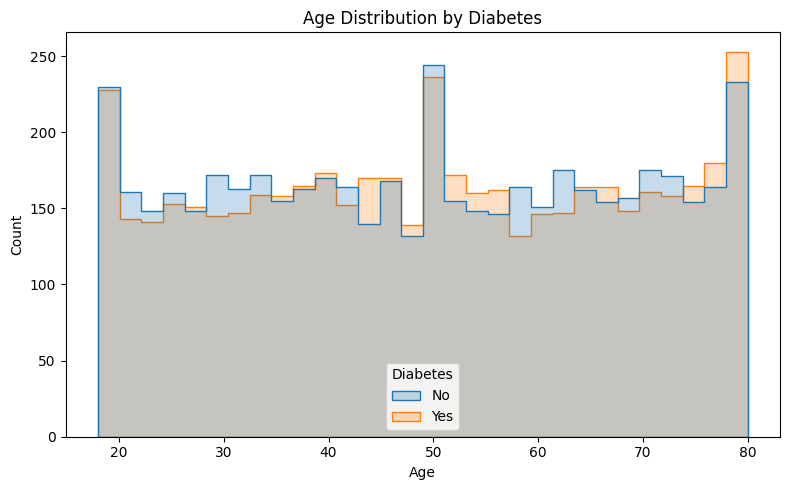

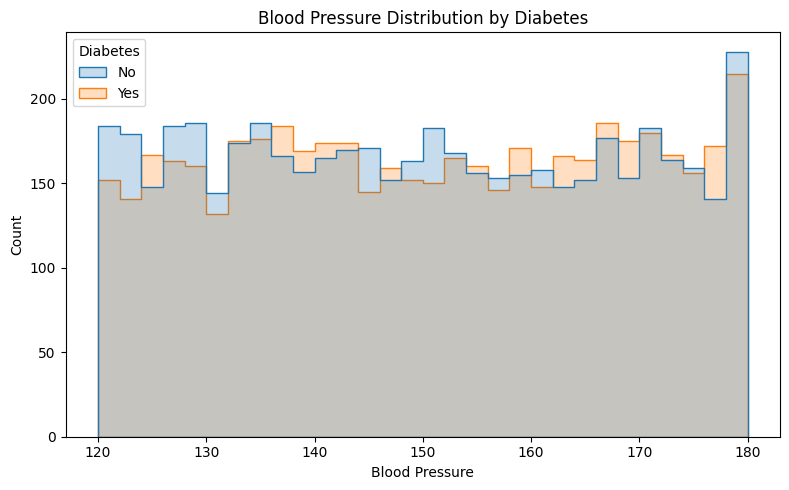

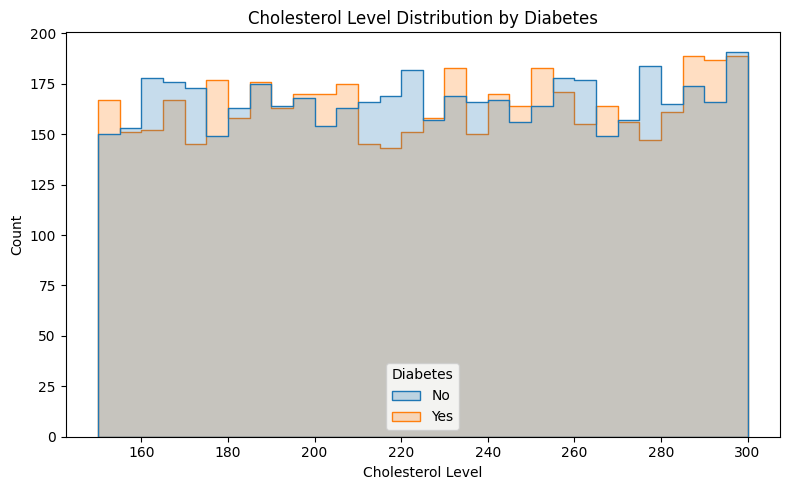

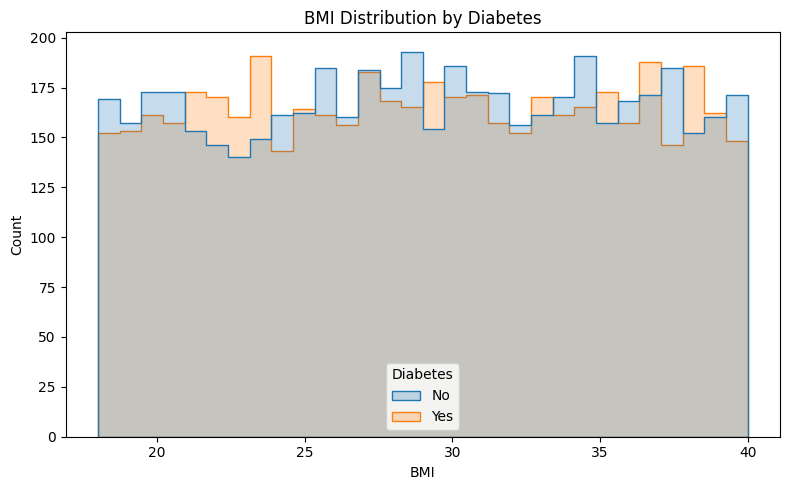

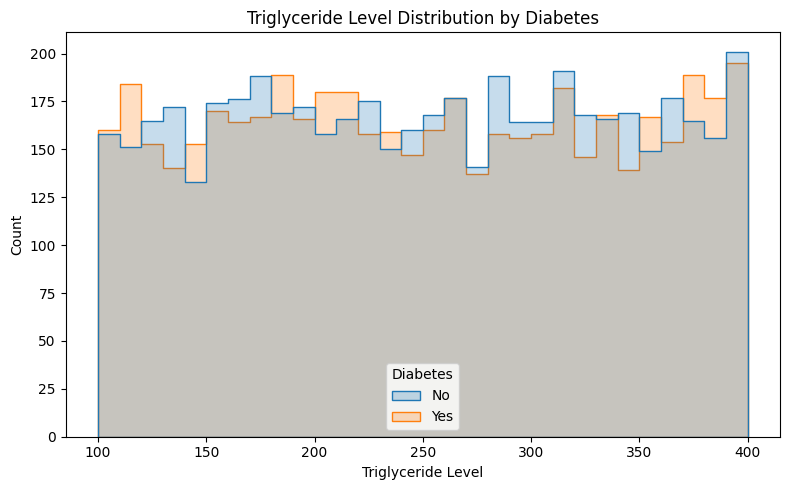

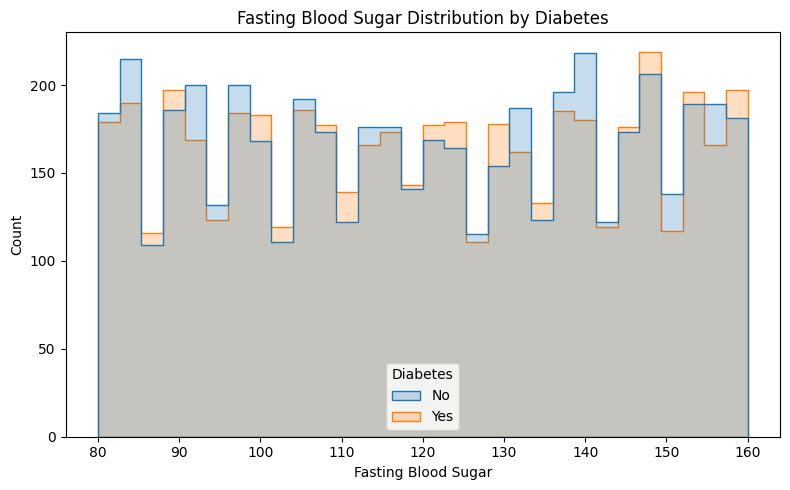

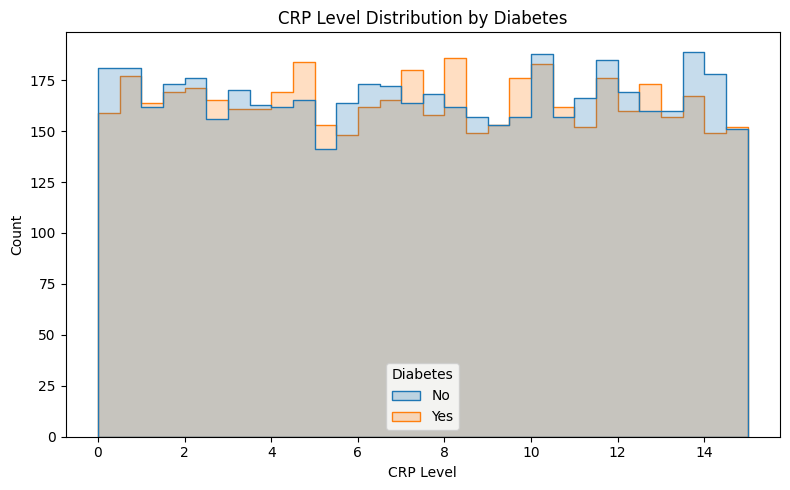

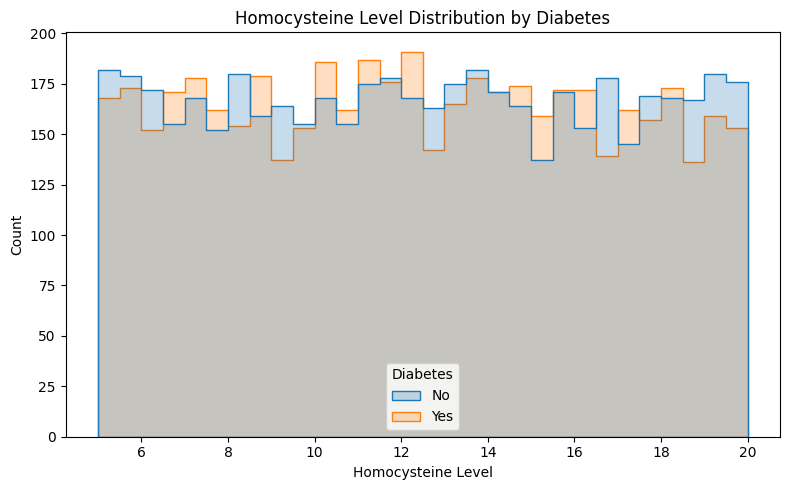

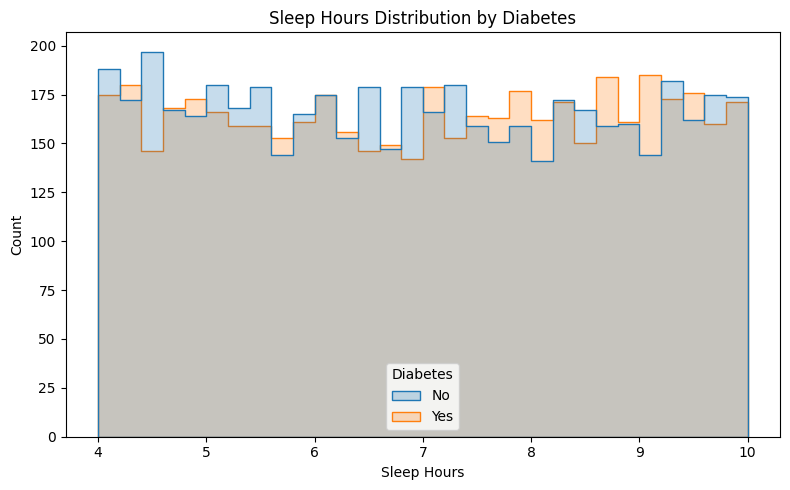

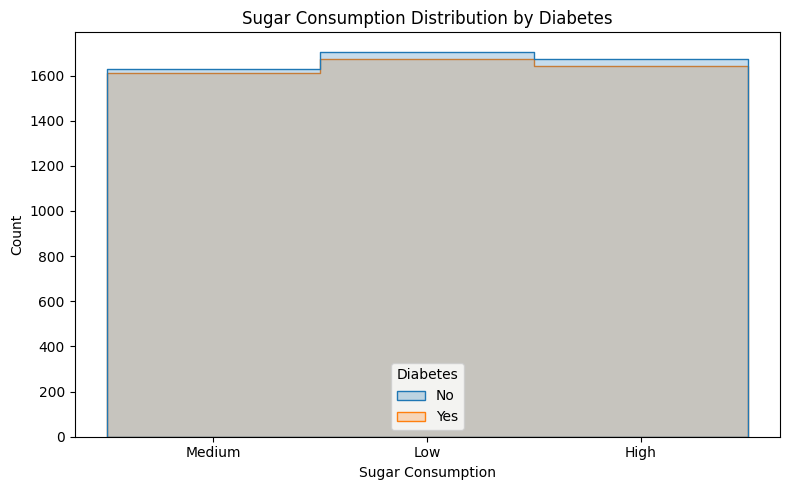

In [ ]:
#grouped histograms by diabetes presence 

group_col = 'Diabetes'

# List of numeric columns (excluding the group column itself)
numeric_cols = [
    'Age', 'Blood Pressure', 'Cholesterol Level', 'BMI',
    'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level',
    'Homocysteine Level', 'Sleep Hours', 'Sugar Consumption'
]

# Loop through and plot grouped histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df_heart,
        x=col,
        hue=group_col,
        bins=30,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title(f'{col} Distribution by {group_col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

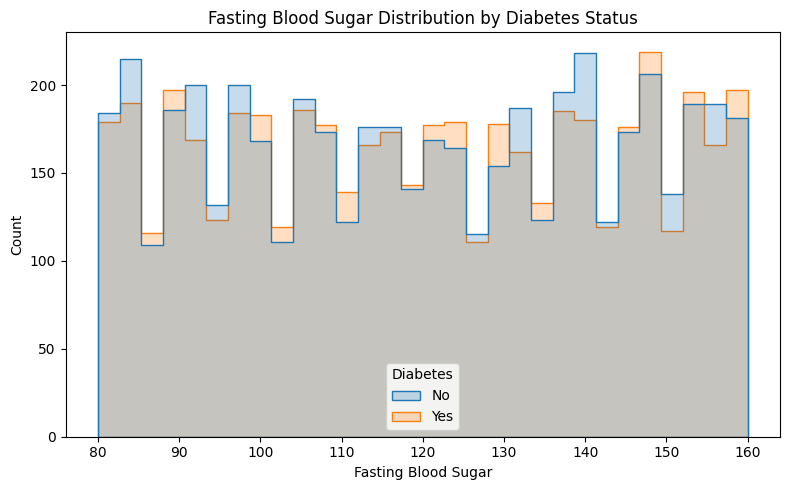

In [21]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_heart,
    x='Fasting Blood Sugar',
    hue='Diabetes',               # group by Diabetes status
    bins=30,
    element='step',               # outlines instead of filled bars
    stat='count',
    common_norm=False             # don't normalize across groups
)

plt.title('Fasting Blood Sugar Distribution by Diabetes Status')
plt.xlabel('Fasting Blood Sugar')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

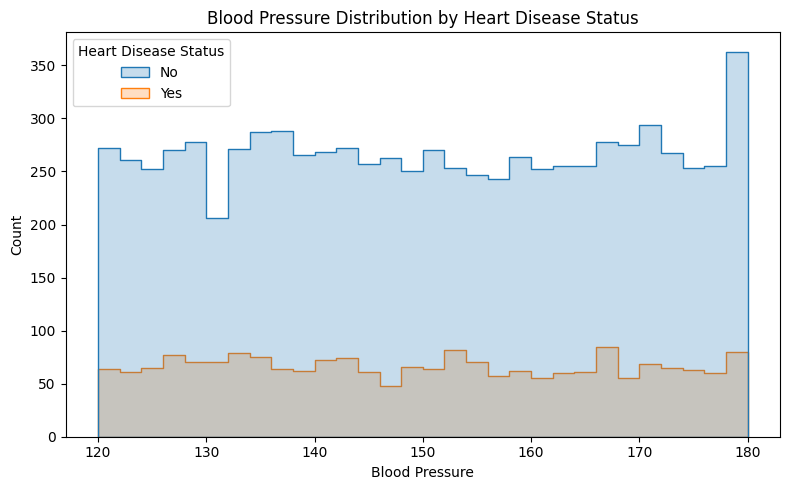

In [22]:
plt.figure(figsize=(8, 5))

sns.histplot(
    data=df_heart,
    x='Blood Pressure',
    hue='Heart Disease Status',  # group by presence of heart disease
    bins=30,
    element='step',              # outline style
    stat='count',
    common_norm=False            # show raw counts, not normalized
)

plt.title('Blood Pressure Distribution by Heart Disease Status')
plt.xlabel('Blood Pressure')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


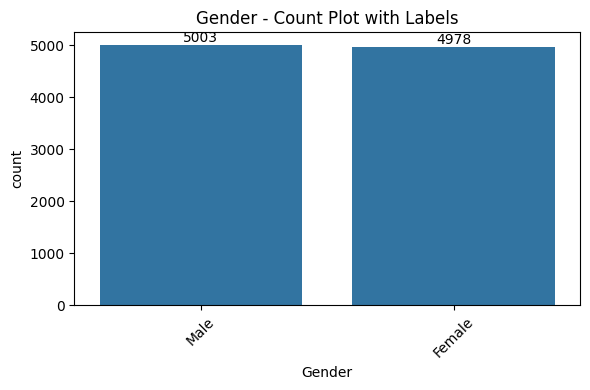

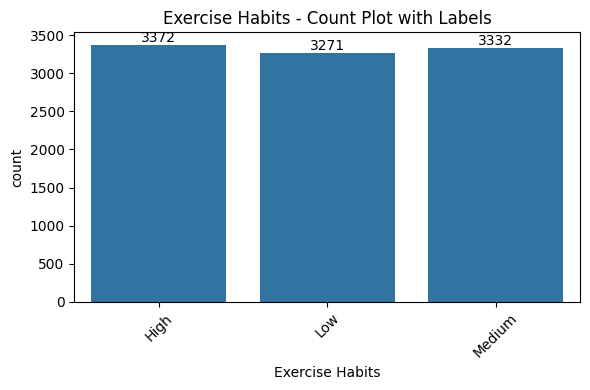

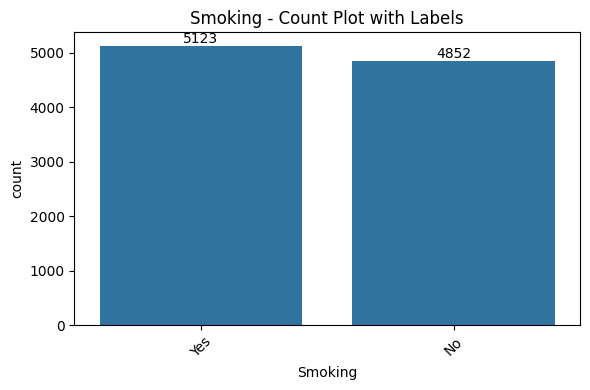

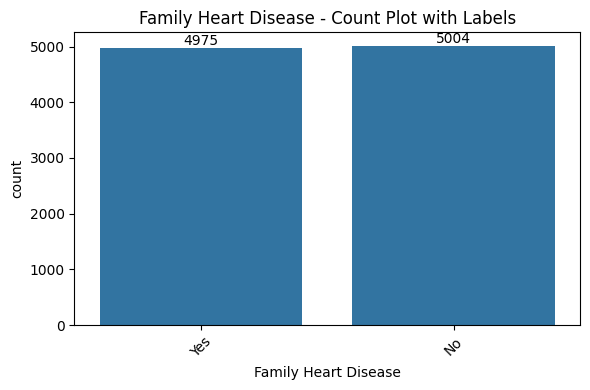

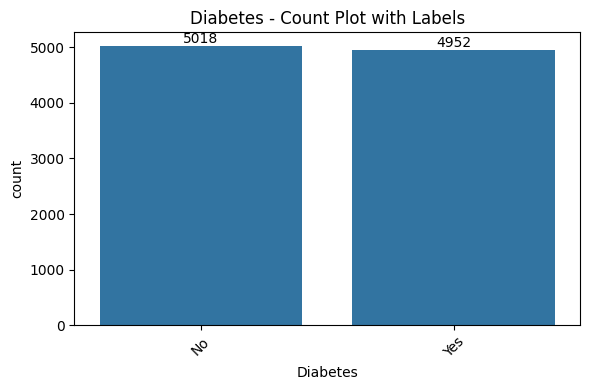

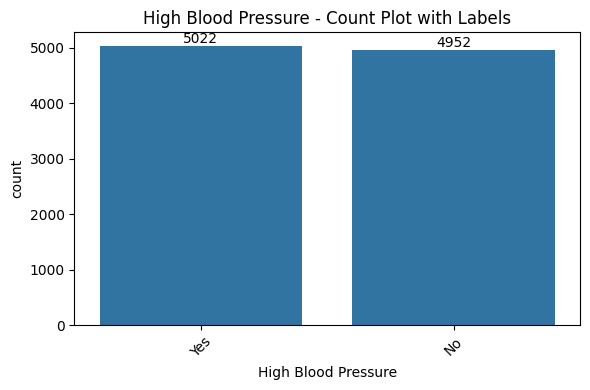

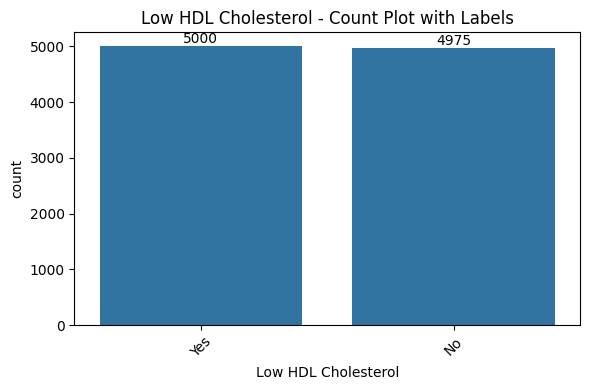

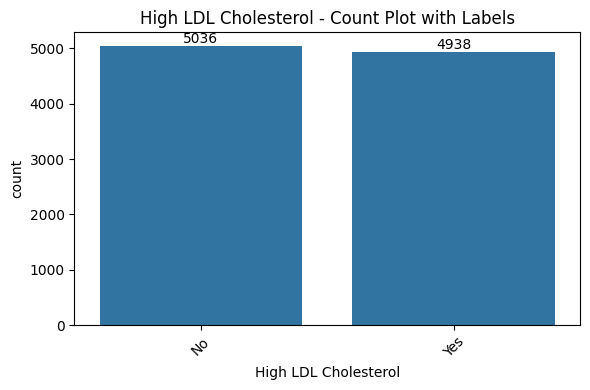

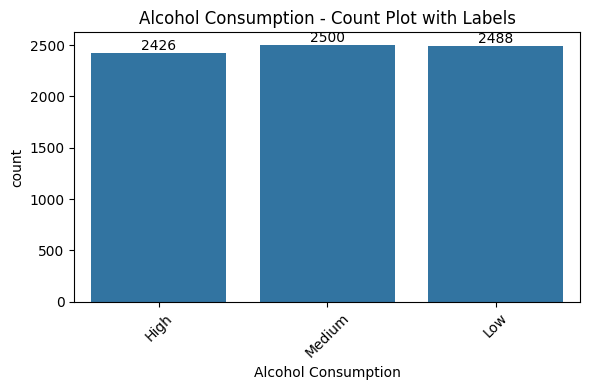

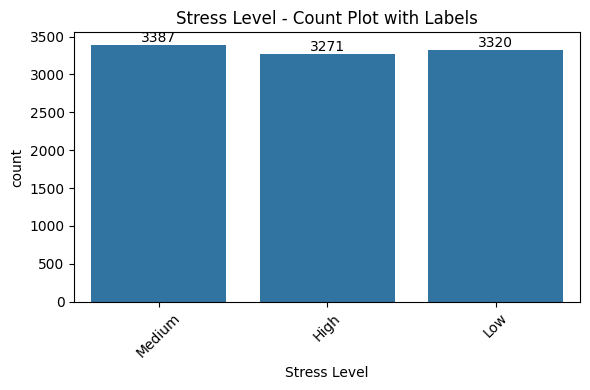

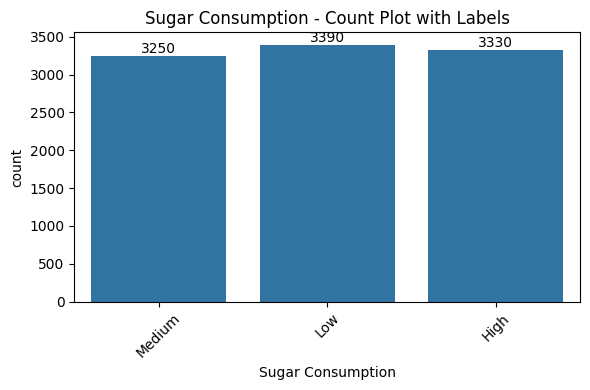

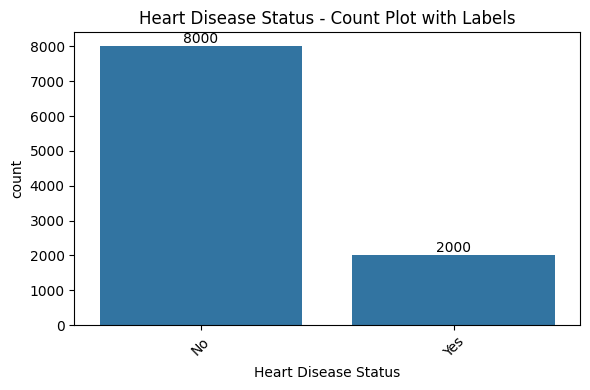

In [10]:
# bar plots for categorical columns 
# Loop through categorical columns
for col in df_heart.select_dtypes(include=['object', 'category', 'bool']).columns:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(x=col, data=df_heart)
    plt.title(f'{col} - Count Plot with Labels')
    plt.xticks(rotation=45)

    # Add count labels above bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            x=p.get_x() + p.get_width() / 2,
            y=height + 0.5,
            s=int(height),
            ha='center',
            va='bottom'
        )

    plt.tight_layout()
    plt.show()

In [17]:
#Find means, medians, and modes

numeric_cols = df_heart.select_dtypes(include='number')

summary_table = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Mode': numeric_cols.mode().iloc[0]  # mode() can return multiple rows; take the first
})

summary_table = summary_table.round(2)

summary_table

Mean  Median   Mode
Age                   49.30   49.00   71.0
Blood Pressure       149.76  150.00  134.0
Cholesterol Level    225.43  226.00  292.0
BMI                   29.08   29.08   18.0
Sleep Hours            6.99    7.00    4.0
Triglyceride Level   250.73  250.00  307.0
Fasting Blood Sugar  120.14  120.00  119.0
CRP Level              7.47    7.47    0.0
Homocysteine Level    12.46   12.41    5.0

In [20]:
min_max_table = pd.DataFrame({
    "Min": numeric_cols.min(),
    "Max": numeric_cols.max()
})
print(min_max_table)

                            Min         Max
Age                   18.000000   80.000000
Blood Pressure       120.000000  180.000000
Cholesterol Level    150.000000  300.000000
BMI                   18.002837   39.996954
Sleep Hours            4.000605    9.999952
Triglyceride Level   100.000000  400.000000
Fasting Blood Sugar   80.000000  160.000000
CRP Level              0.003647   14.997087
Homocysteine Level     5.000236   19.999037



Conclusions

1) Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
- The data is what I would expect. With health data, there is always a lot of variation due to human nature, but with a lot of datapoints there are clear trends in the data. 
- Since diabetes isn't the focus of this dataset, it appears that there is an even distribution of patients with diabetes. This can be helpful to find correlations with other biomarkers
- The data is useable. Since there are so many categorical columns, it will be a little hard to decide how to group everything. 


2) What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
- All the numerical columns are uniform distribution, meaning the values are evenly spread across the range. The population must have been sampled in a balanced way. Perhaps this is synthetic data?


3) Are there any outliers present?  (Data points that are far from the others.)
- I do not see any outliers from my visualizations so far. 


4) If there are multiple related histograms, how does the distribution change across different groups?
- I grouped by fasting blood glucose and diabetes and there didn't seem to be a correlation. Same with heart disease and blood pressure. 


5) What are the minimum and maximum values represented in each histogram?
- see table above


6) How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
- Too few bins showes more detail but looks noisy, while many bins smooths out the distribution but might be hiding trends and outliers.  


7) Does the distribution appear normal, or does it have a different distribution?
- Appears uniform. 

DATASET 3: Colorectal Cancer Global Dataset

In [24]:
df_cc.columns

Index(['Patient_ID', 'Country', 'Age', 'Gender', 'Cancer_Stage',
       'Tumor_Size_mm', 'Family_History', 'Smoking_History',
       'Alcohol_Consumption', 'Obesity_BMI', 'Diet_Risk', 'Physical_Activity',
       'Diabetes', 'Inflammatory_Bowel_Disease', 'Genetic_Mutation',
       'Screening_History', 'Early_Detection', 'Treatment_Type',
       'Survival_5_years', 'Mortality', 'Healthcare_Costs',
       'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K', 'Urban_or_Rural',
       'Economic_Classification', 'Healthcare_Access', 'Insurance_Status',
       'Survival_Prediction'],
      dtype='object')

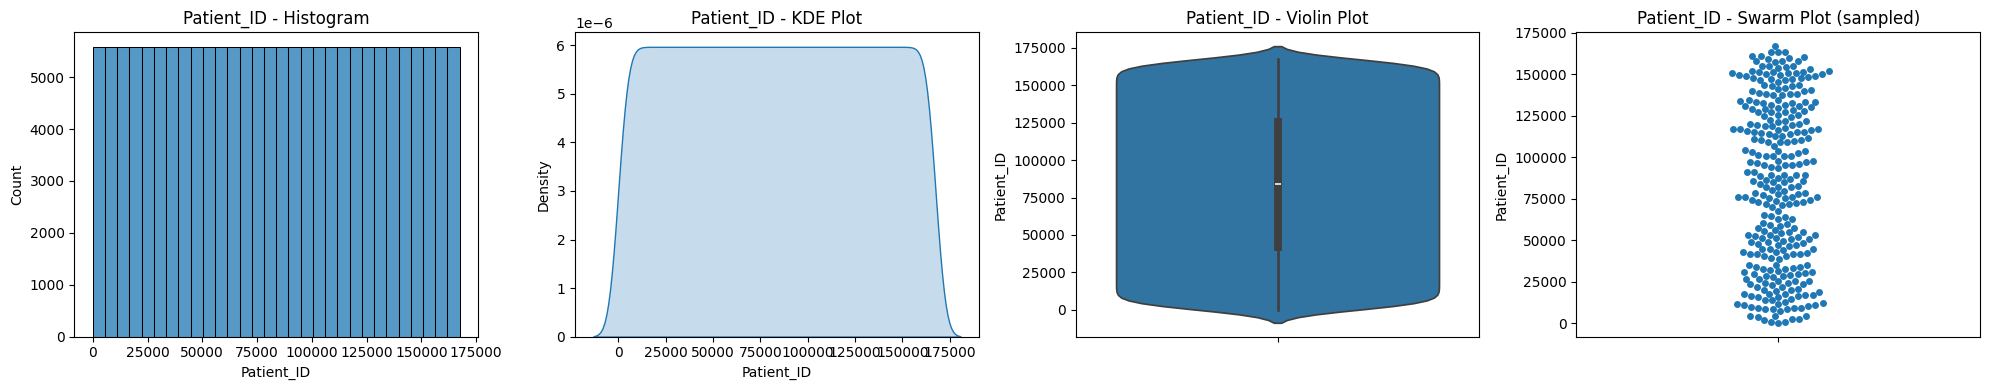

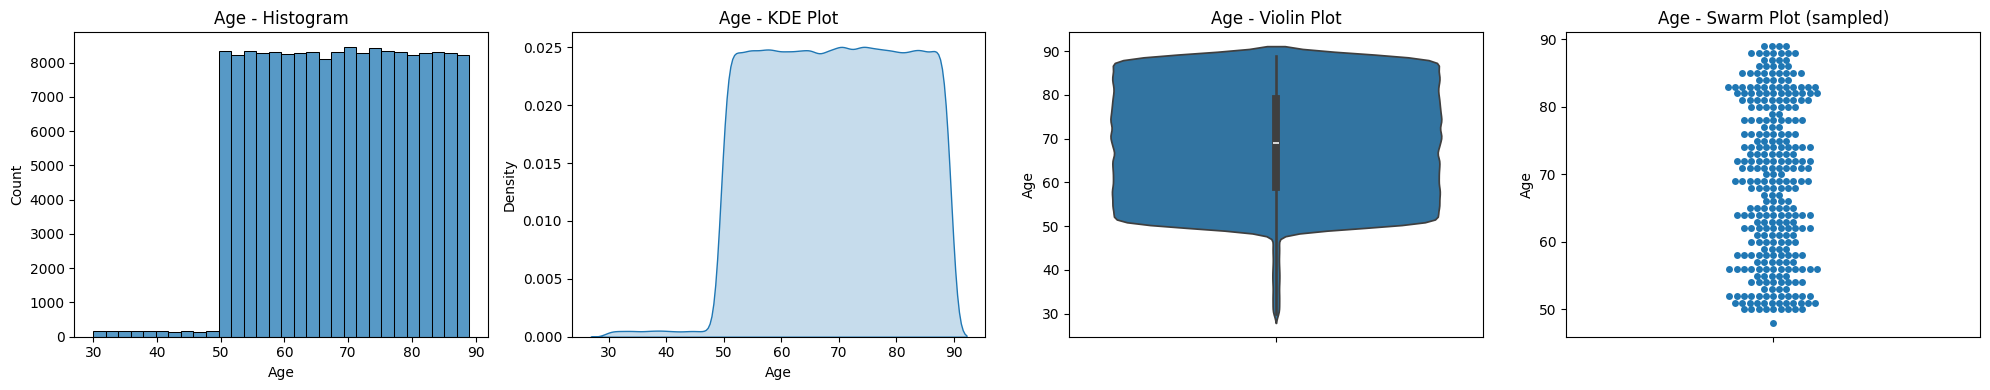

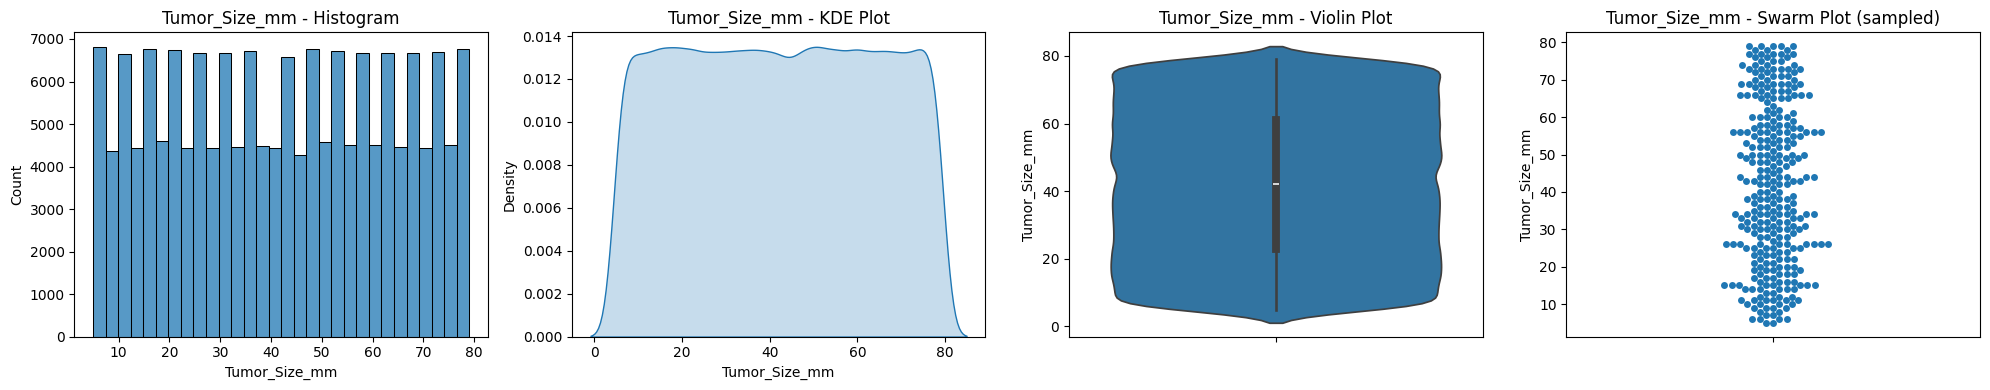

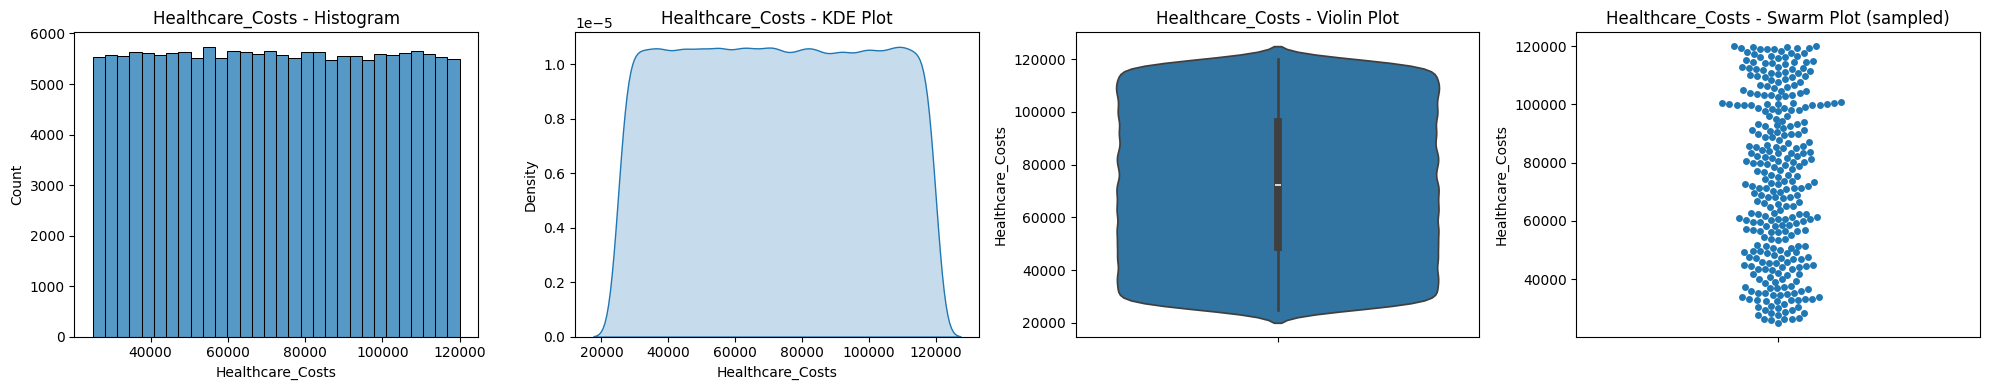

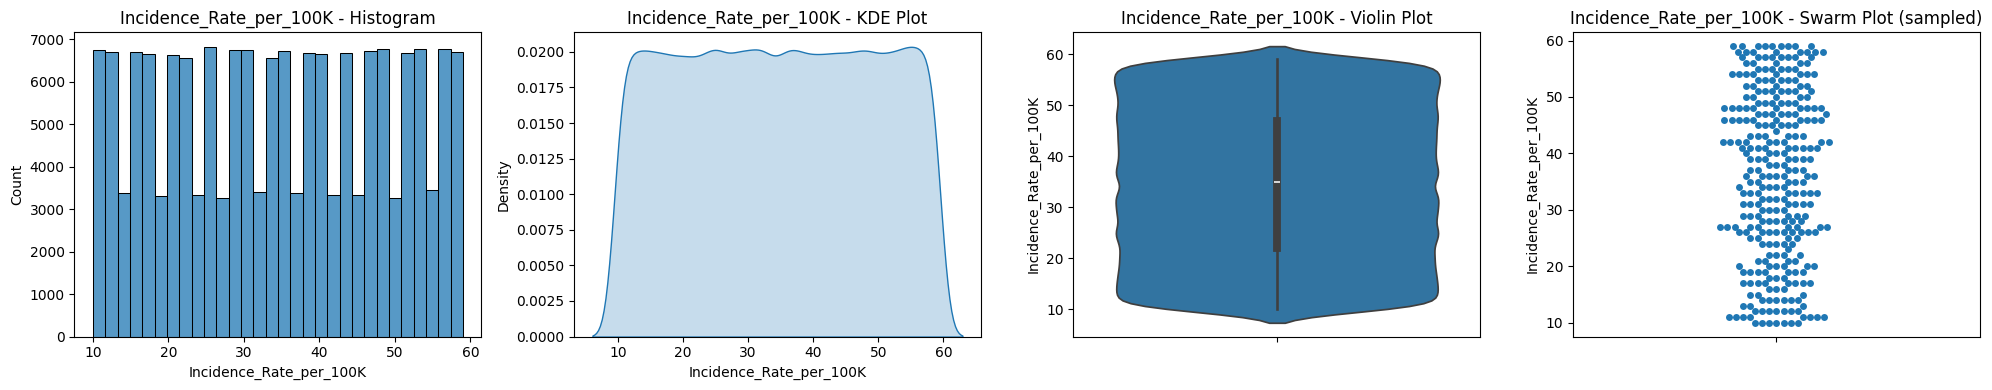

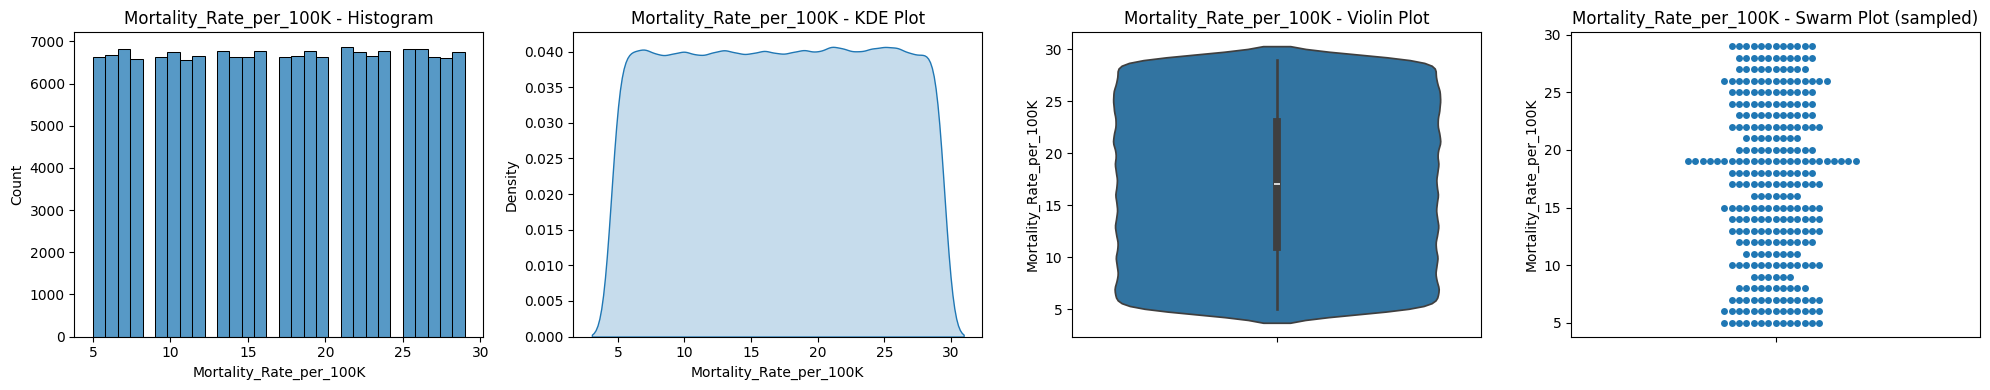

In [23]:
# Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).
for col in df_cc.select_dtypes(include='number').columns:
    plt.figure(figsize=(20, 4))

    # Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df_cc[col], kde=False, bins=30)
    plt.title(f'{col} - Histogram')

    # KDE Plot
    plt.subplot(1, 4, 2)
    sns.kdeplot(df_cc[col], fill=True)
    plt.title(f'{col} - KDE Plot')

    # Violin Plot
    plt.subplot(1, 4, 3)
    sns.violinplot(y=df_cc[col])
    plt.title(f'{col} - Violin Plot')

    # Swarm Plot (use sample if too large)
    plt.subplot(1, 4, 4)
    if len(df_cc) > 300:
        sample = df_cc.sample(n=300, random_state=42)
        sns.swarmplot(y=sample[col], x=[""] * len(sample))
        plt.title(f'{col} - Swarm Plot (sampled)')
    else:
        sns.swarmplot(y=df_cc[col], x=[""] * len(df_cc))
        plt.title(f'{col} - Swarm Plot')

    plt.tight_layout()
    plt.show()
    plt.close()

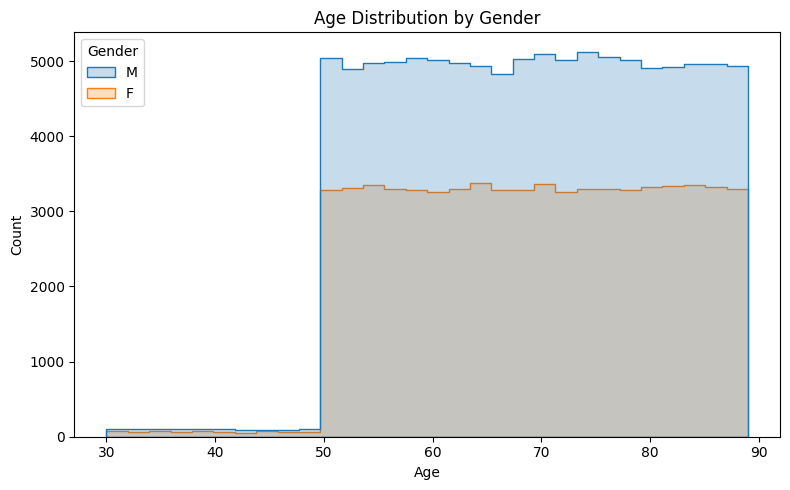

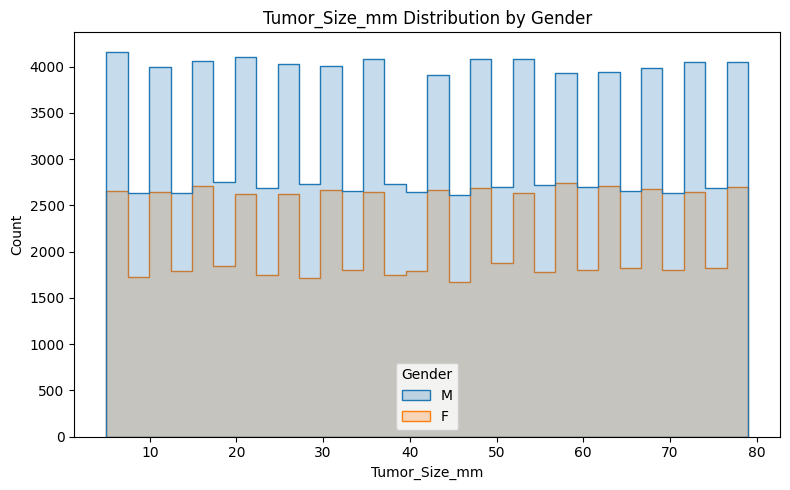

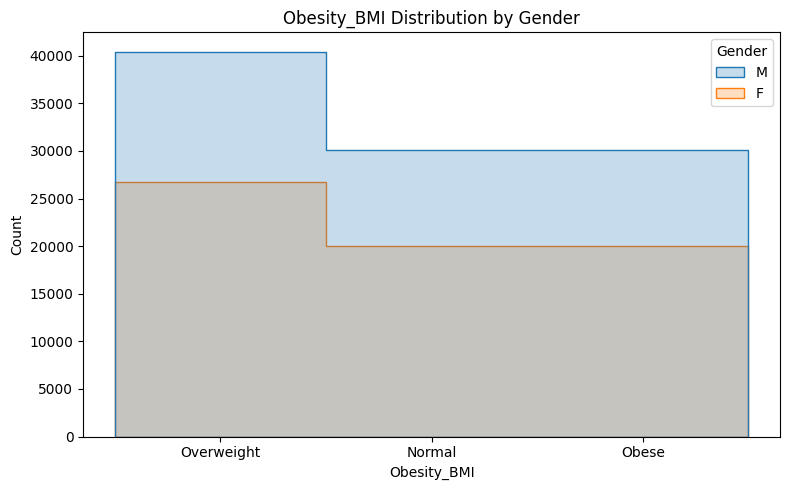

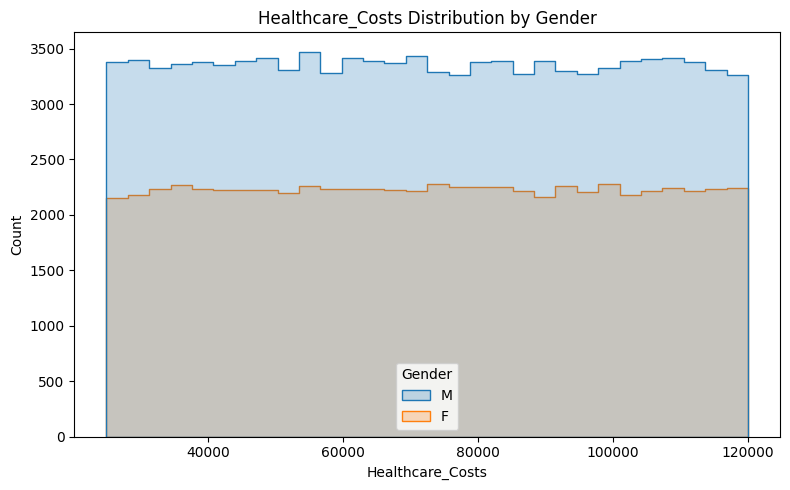

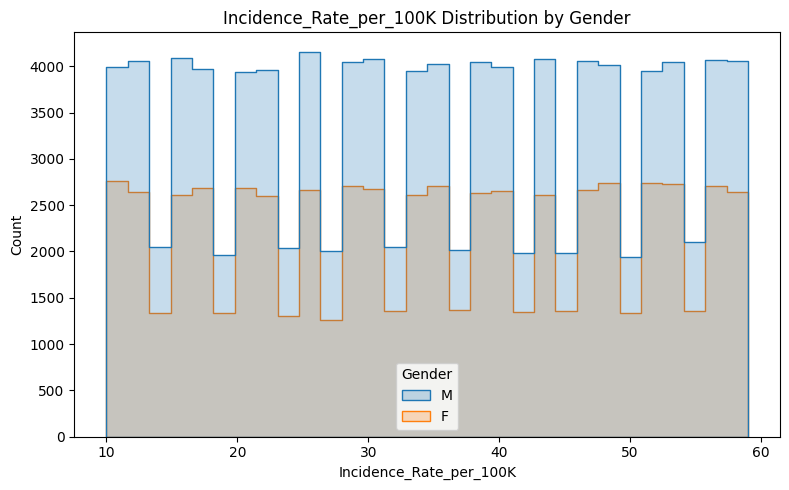

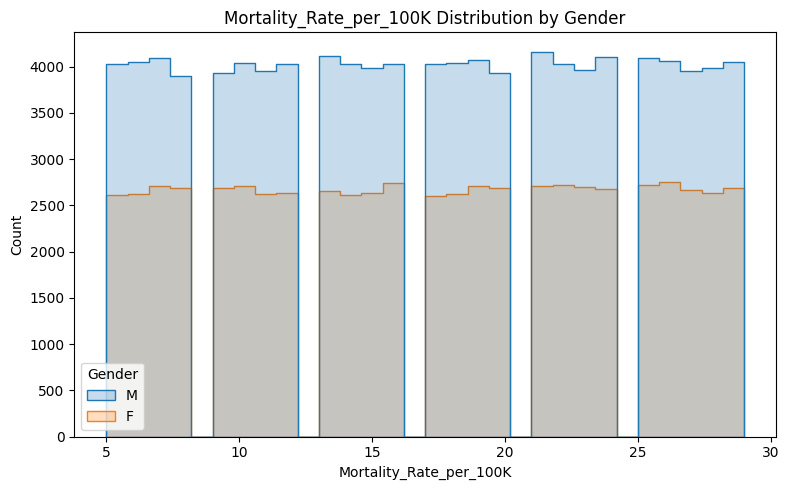

In [ ]:
#histograms grouped by gender

group_col = 'Gender'  # Or try 'Smoking_History', 'Cancer_Stage', etc.

numeric_cols = ['Age', 'Tumor_Size_mm', 'Obesity_BMI', 'Healthcare_Costs',
                'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df_cc,
        x=col,
        hue=group_col,
        bins=30,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title(f'{col} Distribution by {group_col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()


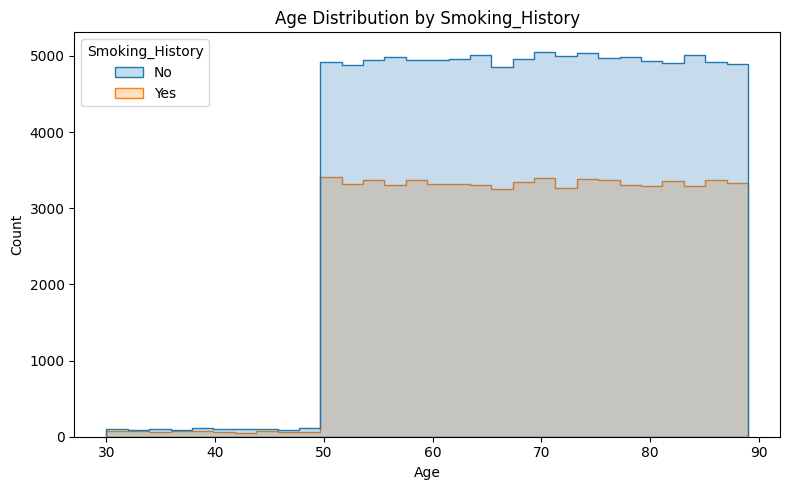

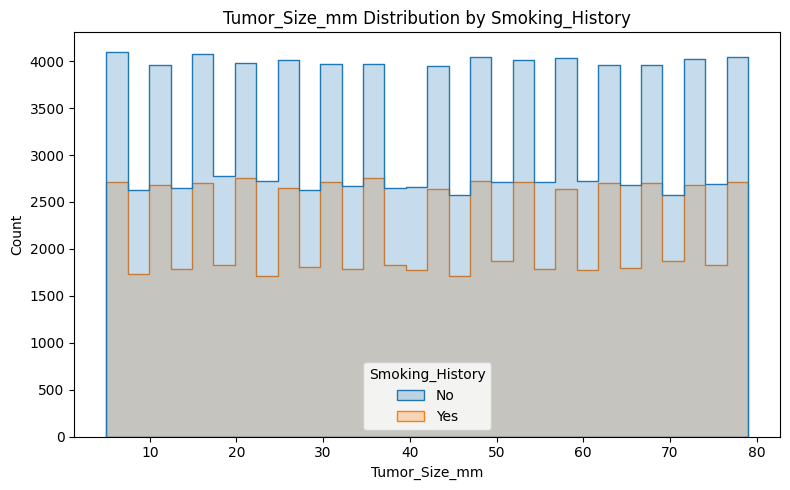

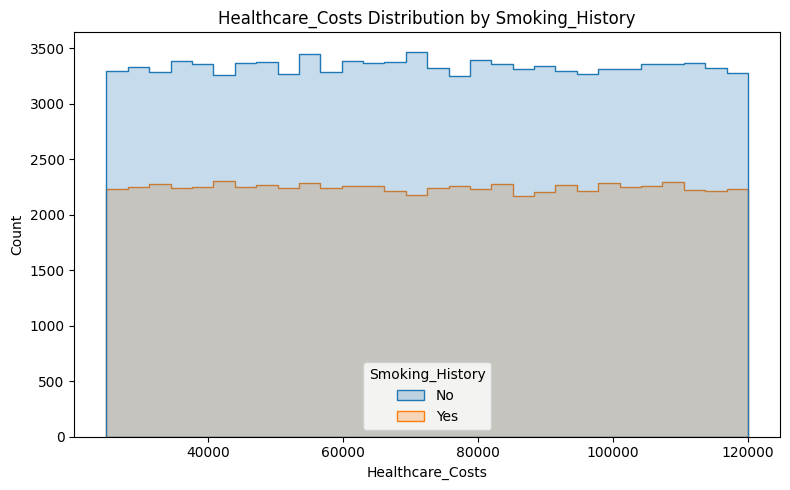

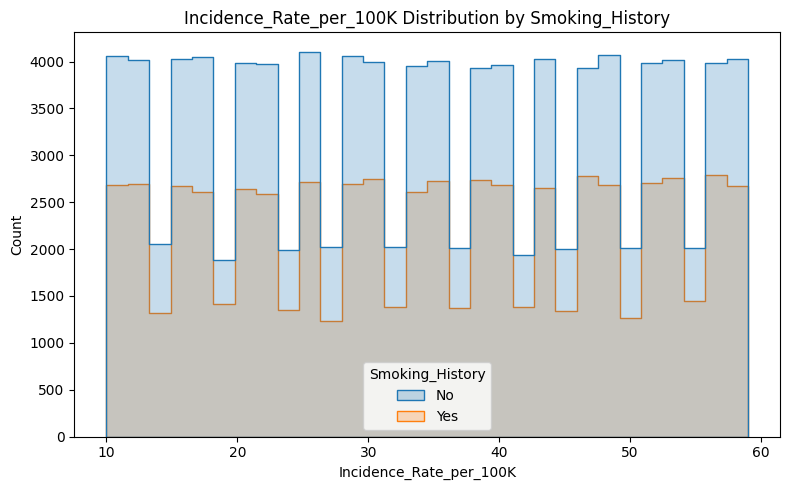

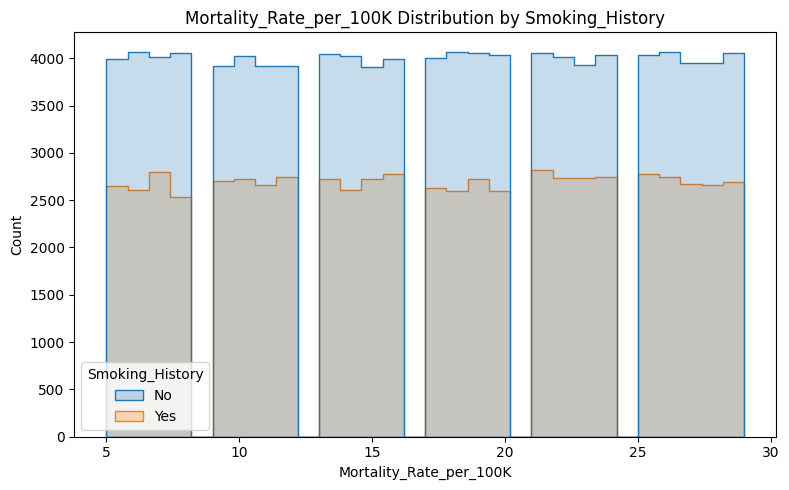

In [26]:
#histograms grouped by smoking

numeric_cols = df_cc.select_dtypes(include='number').columns.drop('Patient_ID', errors='ignore')

group_col = 'Smoking_History'

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=df_cc,
        x=col,
        hue=group_col,
        bins=30,
        element='step',
        stat='count',
        common_norm=False
    )
    plt.title(f'{col} Distribution by {group_col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



In [30]:
df_cc.dtypes

Patient_ID                      int64
Country                        object
Age                             int64
Gender                         object
Cancer_Stage                   object
Tumor_Size_mm                   int64
Family_History                 object
Smoking_History                object
Alcohol_Consumption            object
Obesity_BMI                   float64
Diet_Risk                      object
Physical_Activity              object
Diabetes                       object
Inflammatory_Bowel_Disease     object
Genetic_Mutation               object
Screening_History              object
Early_Detection                object
Treatment_Type                 object
Survival_5_years               object
Mortality                      object
Healthcare_Costs                int64
Incidence_Rate_per_100K         int64
Mortality_Rate_per_100K         int64
Urban_or_Rural                 object
Economic_Classification        object
Healthcare_Access              object
Insurance_St

In [32]:
cc_categorical_cols = [
    'Country', 'Gender', 'Cancer_Stage', 'Family_History', 'Smoking_History',
    'Alcohol_Consumption', 'Diet_Risk', 'Physical_Activity', 'Diabetes',
    'Inflammatory_Bowel_Disease', 'Genetic_Mutation', 'Screening_History',
    'Early_Detection', 'Treatment_Type', 'Survival_5_years', 'Mortality',
    'Urban_or_Rural', 'Economic_Classification', 'Healthcare_Access',
    'Insurance_Status', 'Survival_Prediction'
]

cc_numeric_cols = [
    'Patient_ID', 'Age', 'Tumor_Size_mm', 'Obesity_BMI', 'Healthcare_Costs',
    'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K'
]

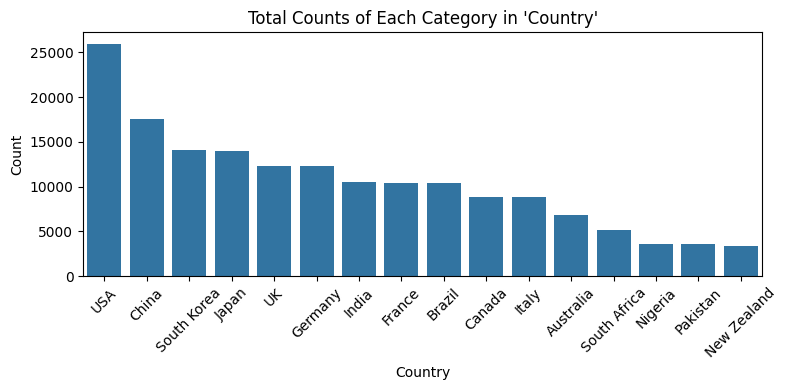

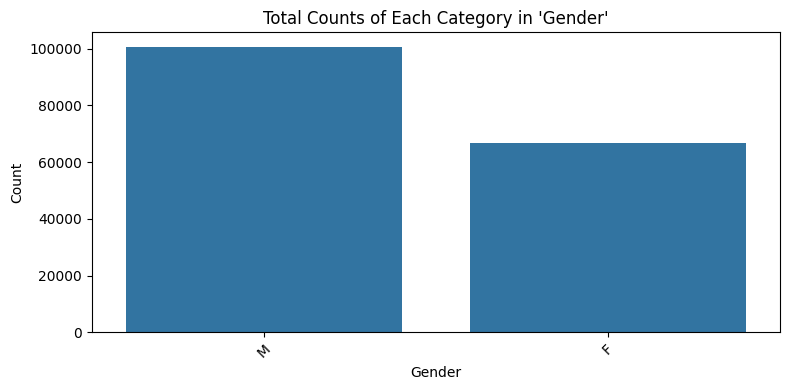

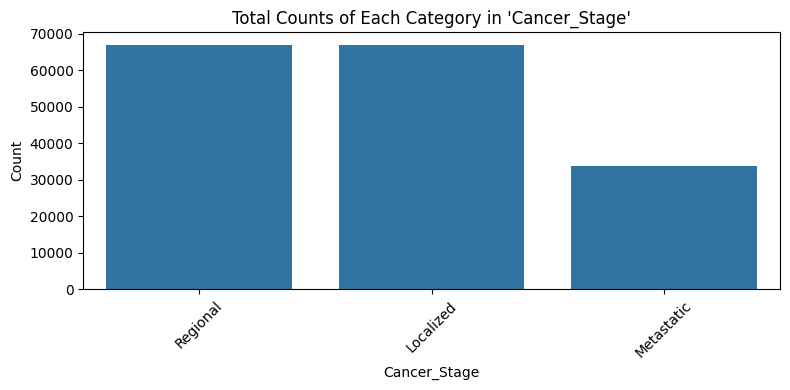

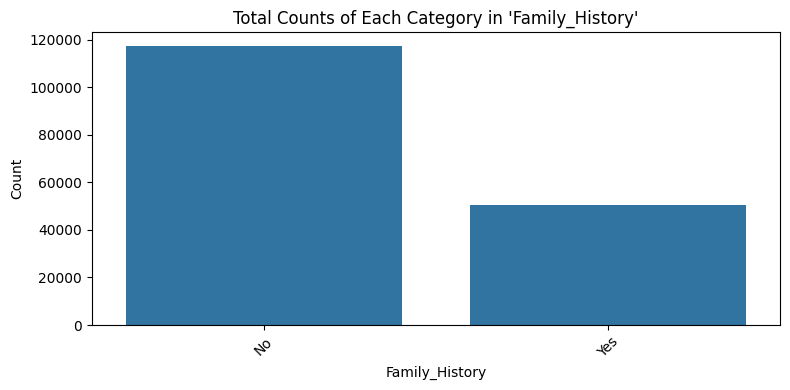

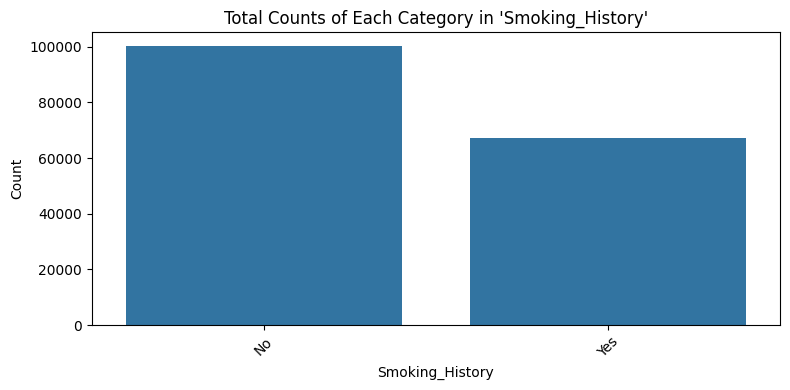

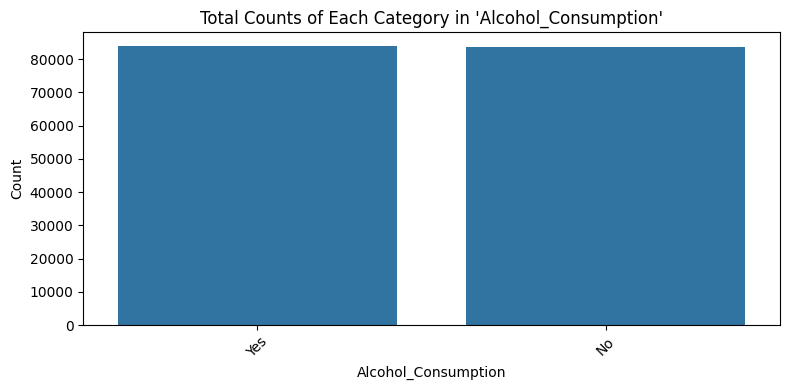

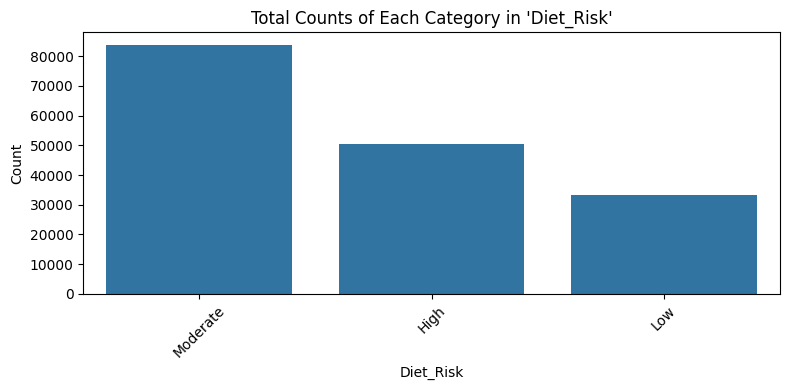

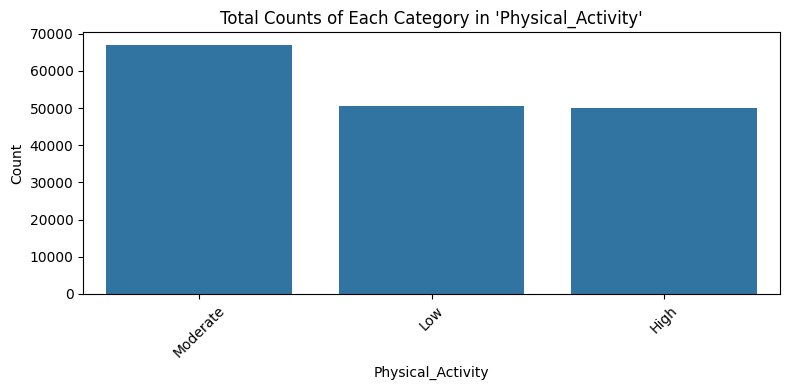

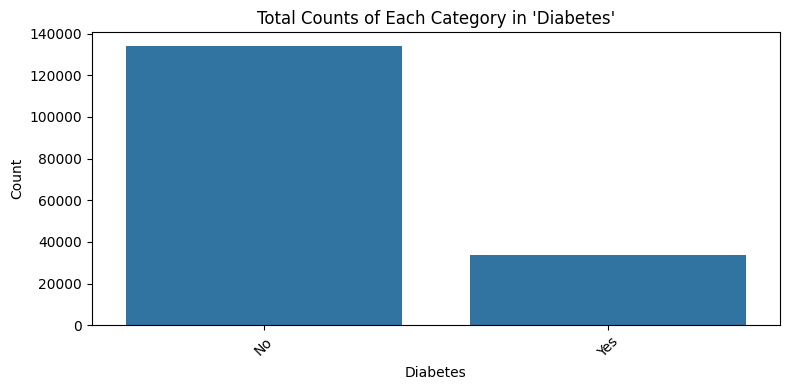

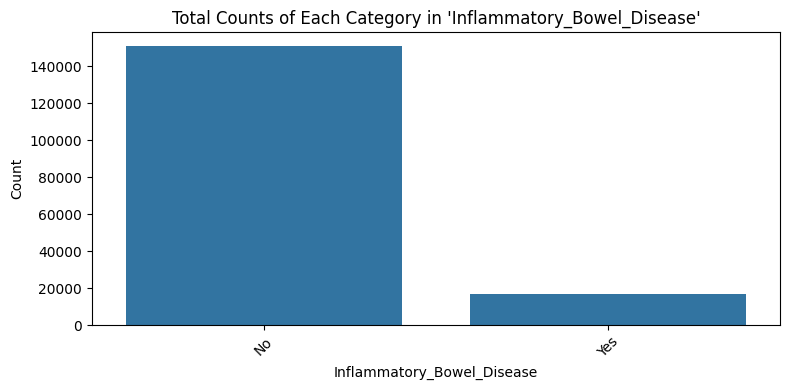

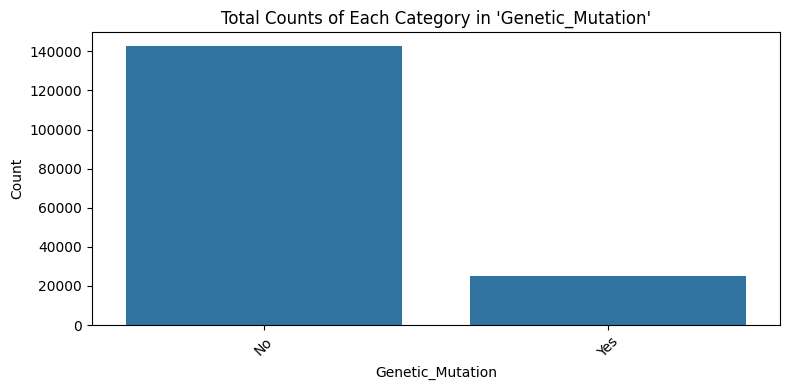

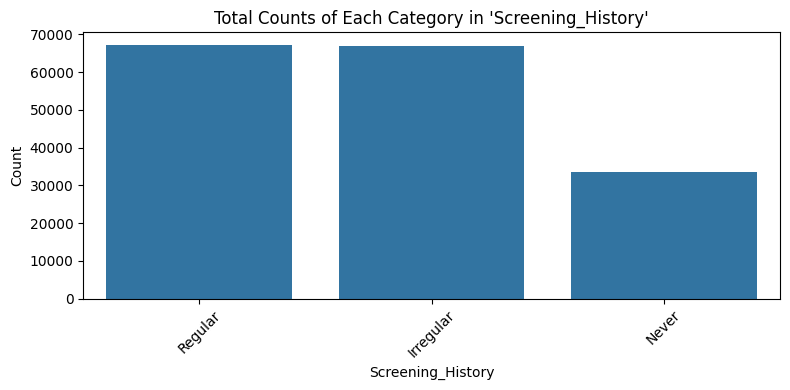

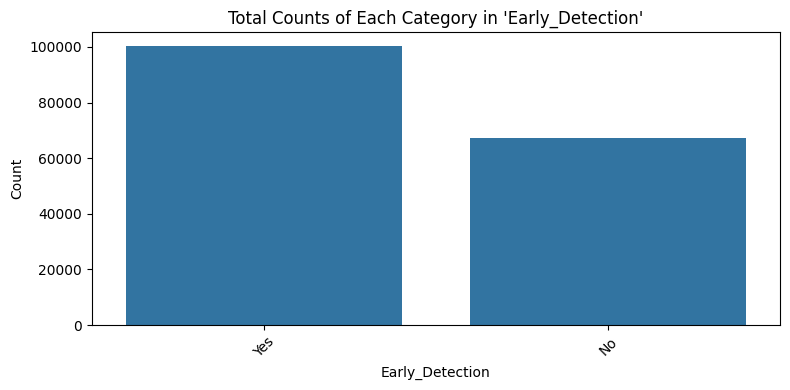

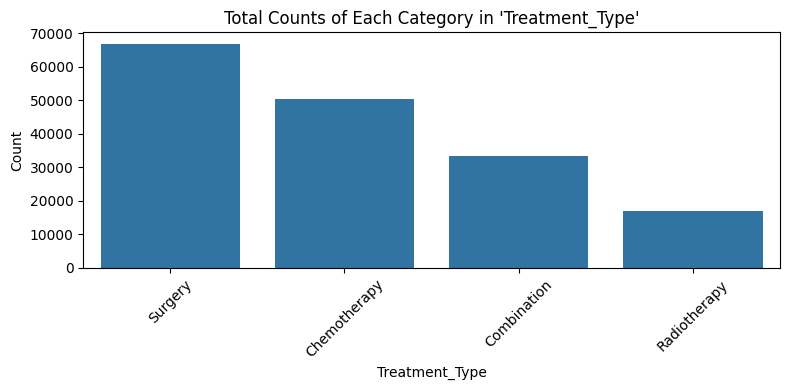

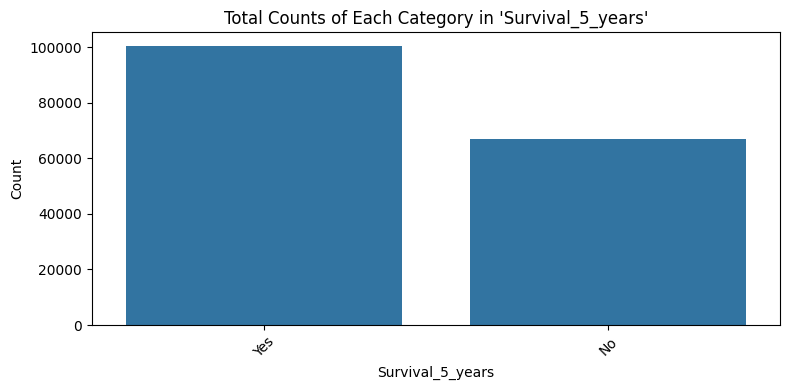

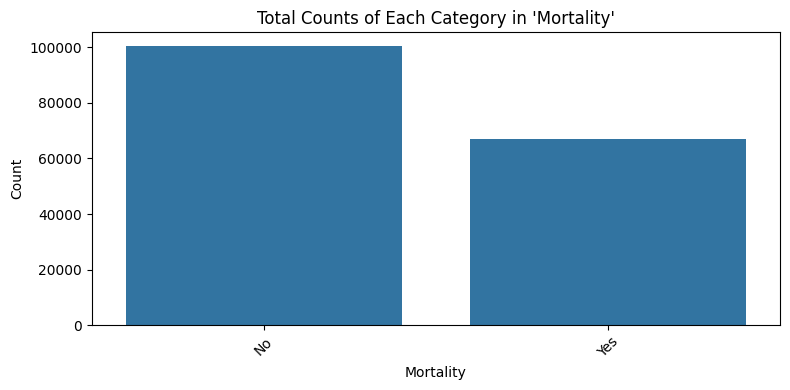

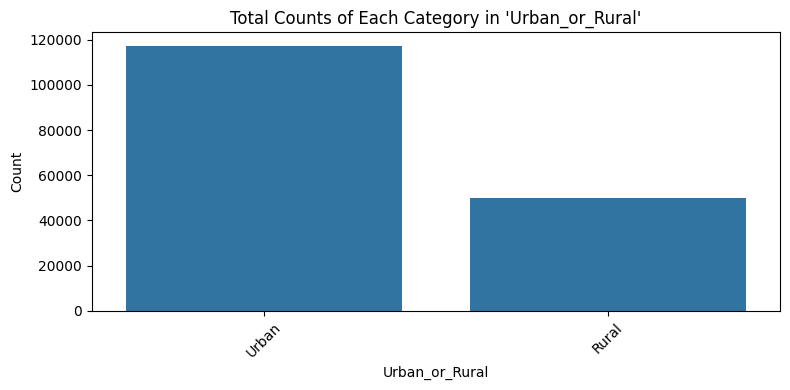

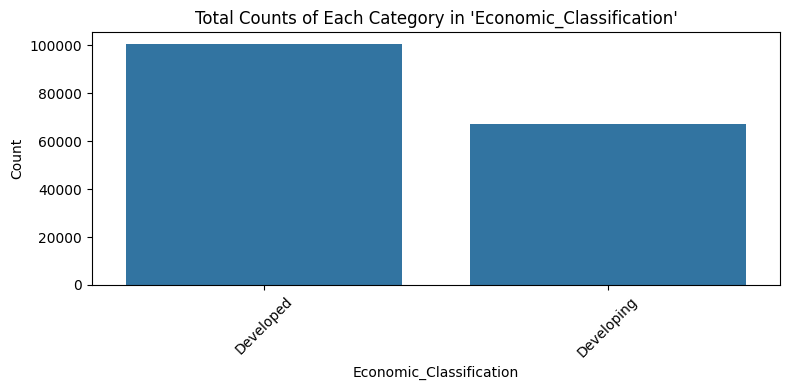

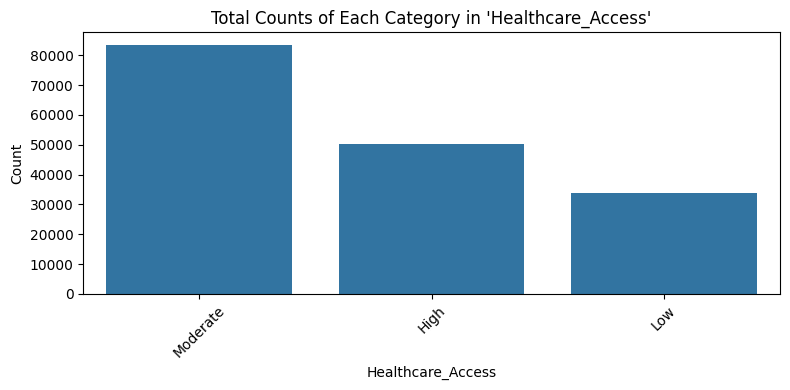

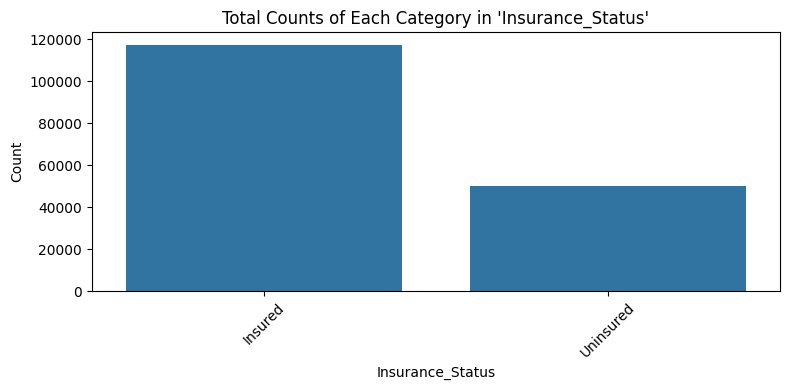

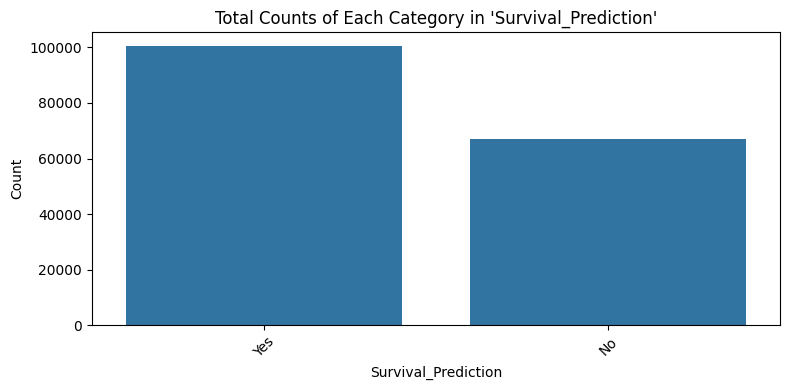

In [33]:
# bar plot for categorical columns

for col in cc_categorical_cols:
    plt.figure(figsize=(8, 4))
    plot_data = df_cc[col].dropna()
    sns.countplot(x=plot_data, order=plot_data.value_counts().index)
    plt.title(f"Total Counts of Each Category in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [35]:
# Find means, medians, and modes

numeric_df_cc = df_cc.select_dtypes(include='number')

summary_stats = pd.DataFrame({
    'Mean': numeric_df_cc.mean(),
    'Median': numeric_df_cc.median(),
    'Mode': numeric_df_cc.mode().iloc[0]  # Take the first mode in case of ties
})
summary_stats = summary_stats.round(2)

print(summary_stats)

                             Mean   Median     Mode
Patient_ID               83749.00  83749.0      1.0
Age                         69.20     69.0     74.0
Tumor_Size_mm               42.01     42.0     22.0
Obesity_BMI                   NaN      NaN      NaN
Healthcare_Costs         72452.17  72344.0  53546.0
Incidence_Rate_per_100K     34.53     35.0     25.0
Mortality_Rate_per_100K     17.02     17.0     21.0


In [36]:
min_max_table = pd.DataFrame({
    "Min": numeric_df_cc.min(),
    "Max": numeric_df_cc.max()
})
print(min_max_table)

                             Min       Max
Patient_ID                   1.0  167497.0
Age                         30.0      89.0
Tumor_Size_mm                5.0      79.0
Obesity_BMI                  NaN       NaN
Healthcare_Costs         25000.0  119999.0
Incidence_Rate_per_100K     10.0      59.0
Mortality_Rate_per_100K      5.0      29.0



Conclusions

1) Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!
- The data is what I would expect. With health data, there is always a lot of variation due to human nature, but with a lot of datapoints there are clear trends in the data. 
- The data is useable. Diabetes is one of the columns.  


2) What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?
- Age is dramatically left skewed, but mostly uniform. Everything else is uniformly distributed.


3) Are there any outliers present?  (Data points that are far from the others.)
- it looks like there are some outliers in the age column, specically ages less than 50. 


4) If there are multiple related histograms, how does the distribution change across different groups?
- It seems like there are more males than females in the study. 


5) What are the minimum and maximum values represented in each histogram?
- see table above


6) How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?
- Too few bins showes more detail but looks noisy, while many bins smooths out the distribution but might be hiding trends and outliers.  


7) Does the distribution appear normal, or does it have a different distribution?
- Appears uniform for the most part. 

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

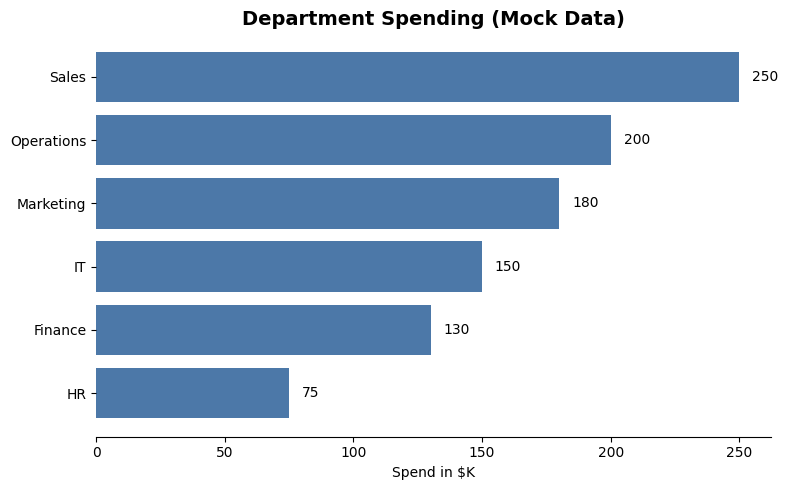

In [16]:
# Simulation data
data = {
    'Department': ['Sales', 'Marketing', 'HR', 'IT', 'Finance', 'Operations'],
    'Spend': [250, 180, 75, 150, 130, 200]
}

df = pd.DataFrame(data).sort_values('Spend', ascending=True)

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(df['Department'], df['Spend'], color='#4C78A8')

# Remove spines and gridlines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(False)

# Add bar labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{width}', va='center')

# Titles and labels
plt.title("Department Spending (Mock Data)", fontsize=14, weight='bold')
plt.xlabel("Spend in $K")
plt.tight_layout()
plt.show()